In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=Warning)

df = pd.read_csv('loan_tap.csv') 

<hr>

<h1>1. DEFINE PROBLEM STATEMENT AND PERFORM EXPLORATORY DATA ANALYSIS AND COMMENTS:- </h1>

<h3>(a) SHAPE AND DATATYPES:-</h3>

In [81]:
print("Shape of the dataset:", df.shape)
print("\nData Types:\n", df.dtypes)

Shape of the dataset: (396030, 27)

Data Types:
 loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object


<h3>(b) MISSING VALUES :-</h3>

In [82]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values[missing_values > 0])
print("\nPercentage of Missing Values:\n", missing_percentage[missing_percentage > 0])


Missing Values:
 emp_title               22927
emp_length              18301
title                    1756
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

Percentage of Missing Values:
 emp_title               5.789208
emp_length              4.621115
title                   0.443401
revol_util              0.069692
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
dtype: float64


<h3>(c) STATISTICAL SUMMARY:- </h3>

In [83]:
print("\nStatistical Summary of Numerical Columns:\n", df.describe())


Statistical Summary of Numerical Columns:
            loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%

<h3>(d) UNIVARIATE AND BIVARIATE ANALYSIS OF ALL ATTRIBUTES:-</h3>

In [84]:
# TAKING OUT NUMERICAL COLUMNS:-

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [85]:
# TAKING OUT CATEGORICAL COLUMNS:-

categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

<h4>UNIVARIATE ANALYSIS OF NUMERICAL COLUMNS:- </h4>

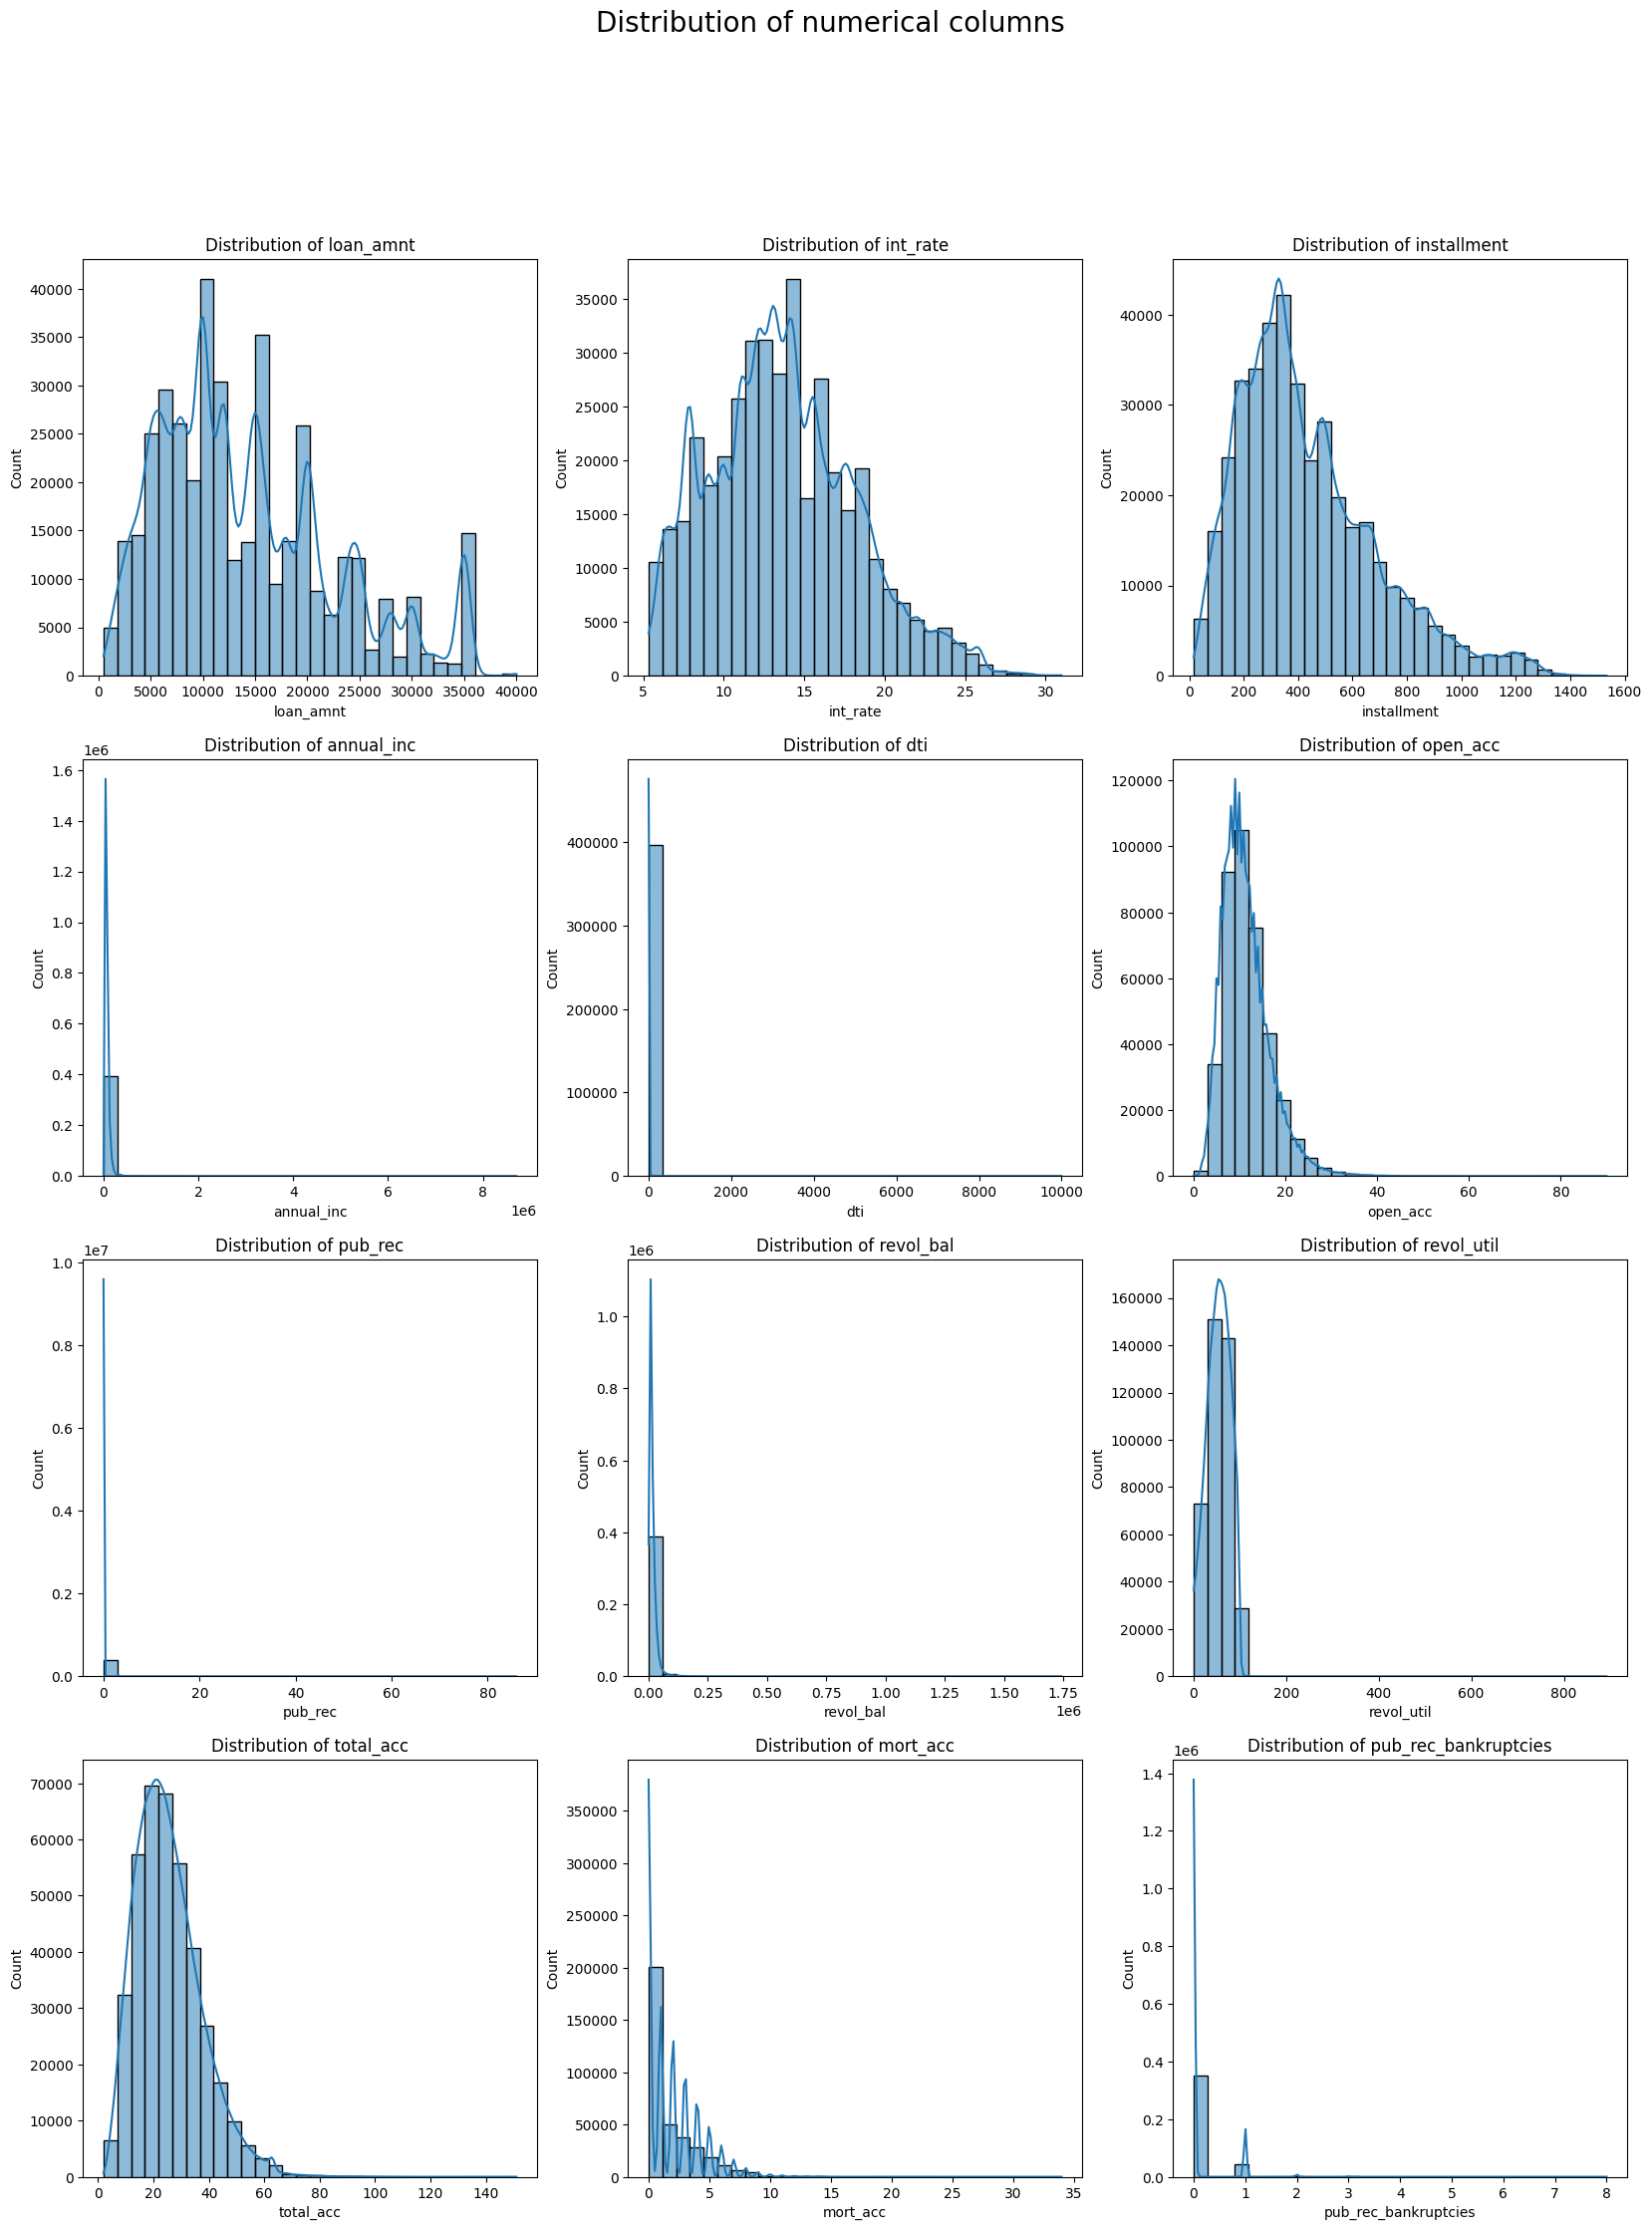

In [86]:
i = 1
plt.figure(figsize=(20,25)).suptitle('Distribution of numerical columns', fontsize=20) 
for col in numerical_cols:
    plt.subplot(4,3,i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    i += 1
plt.show()

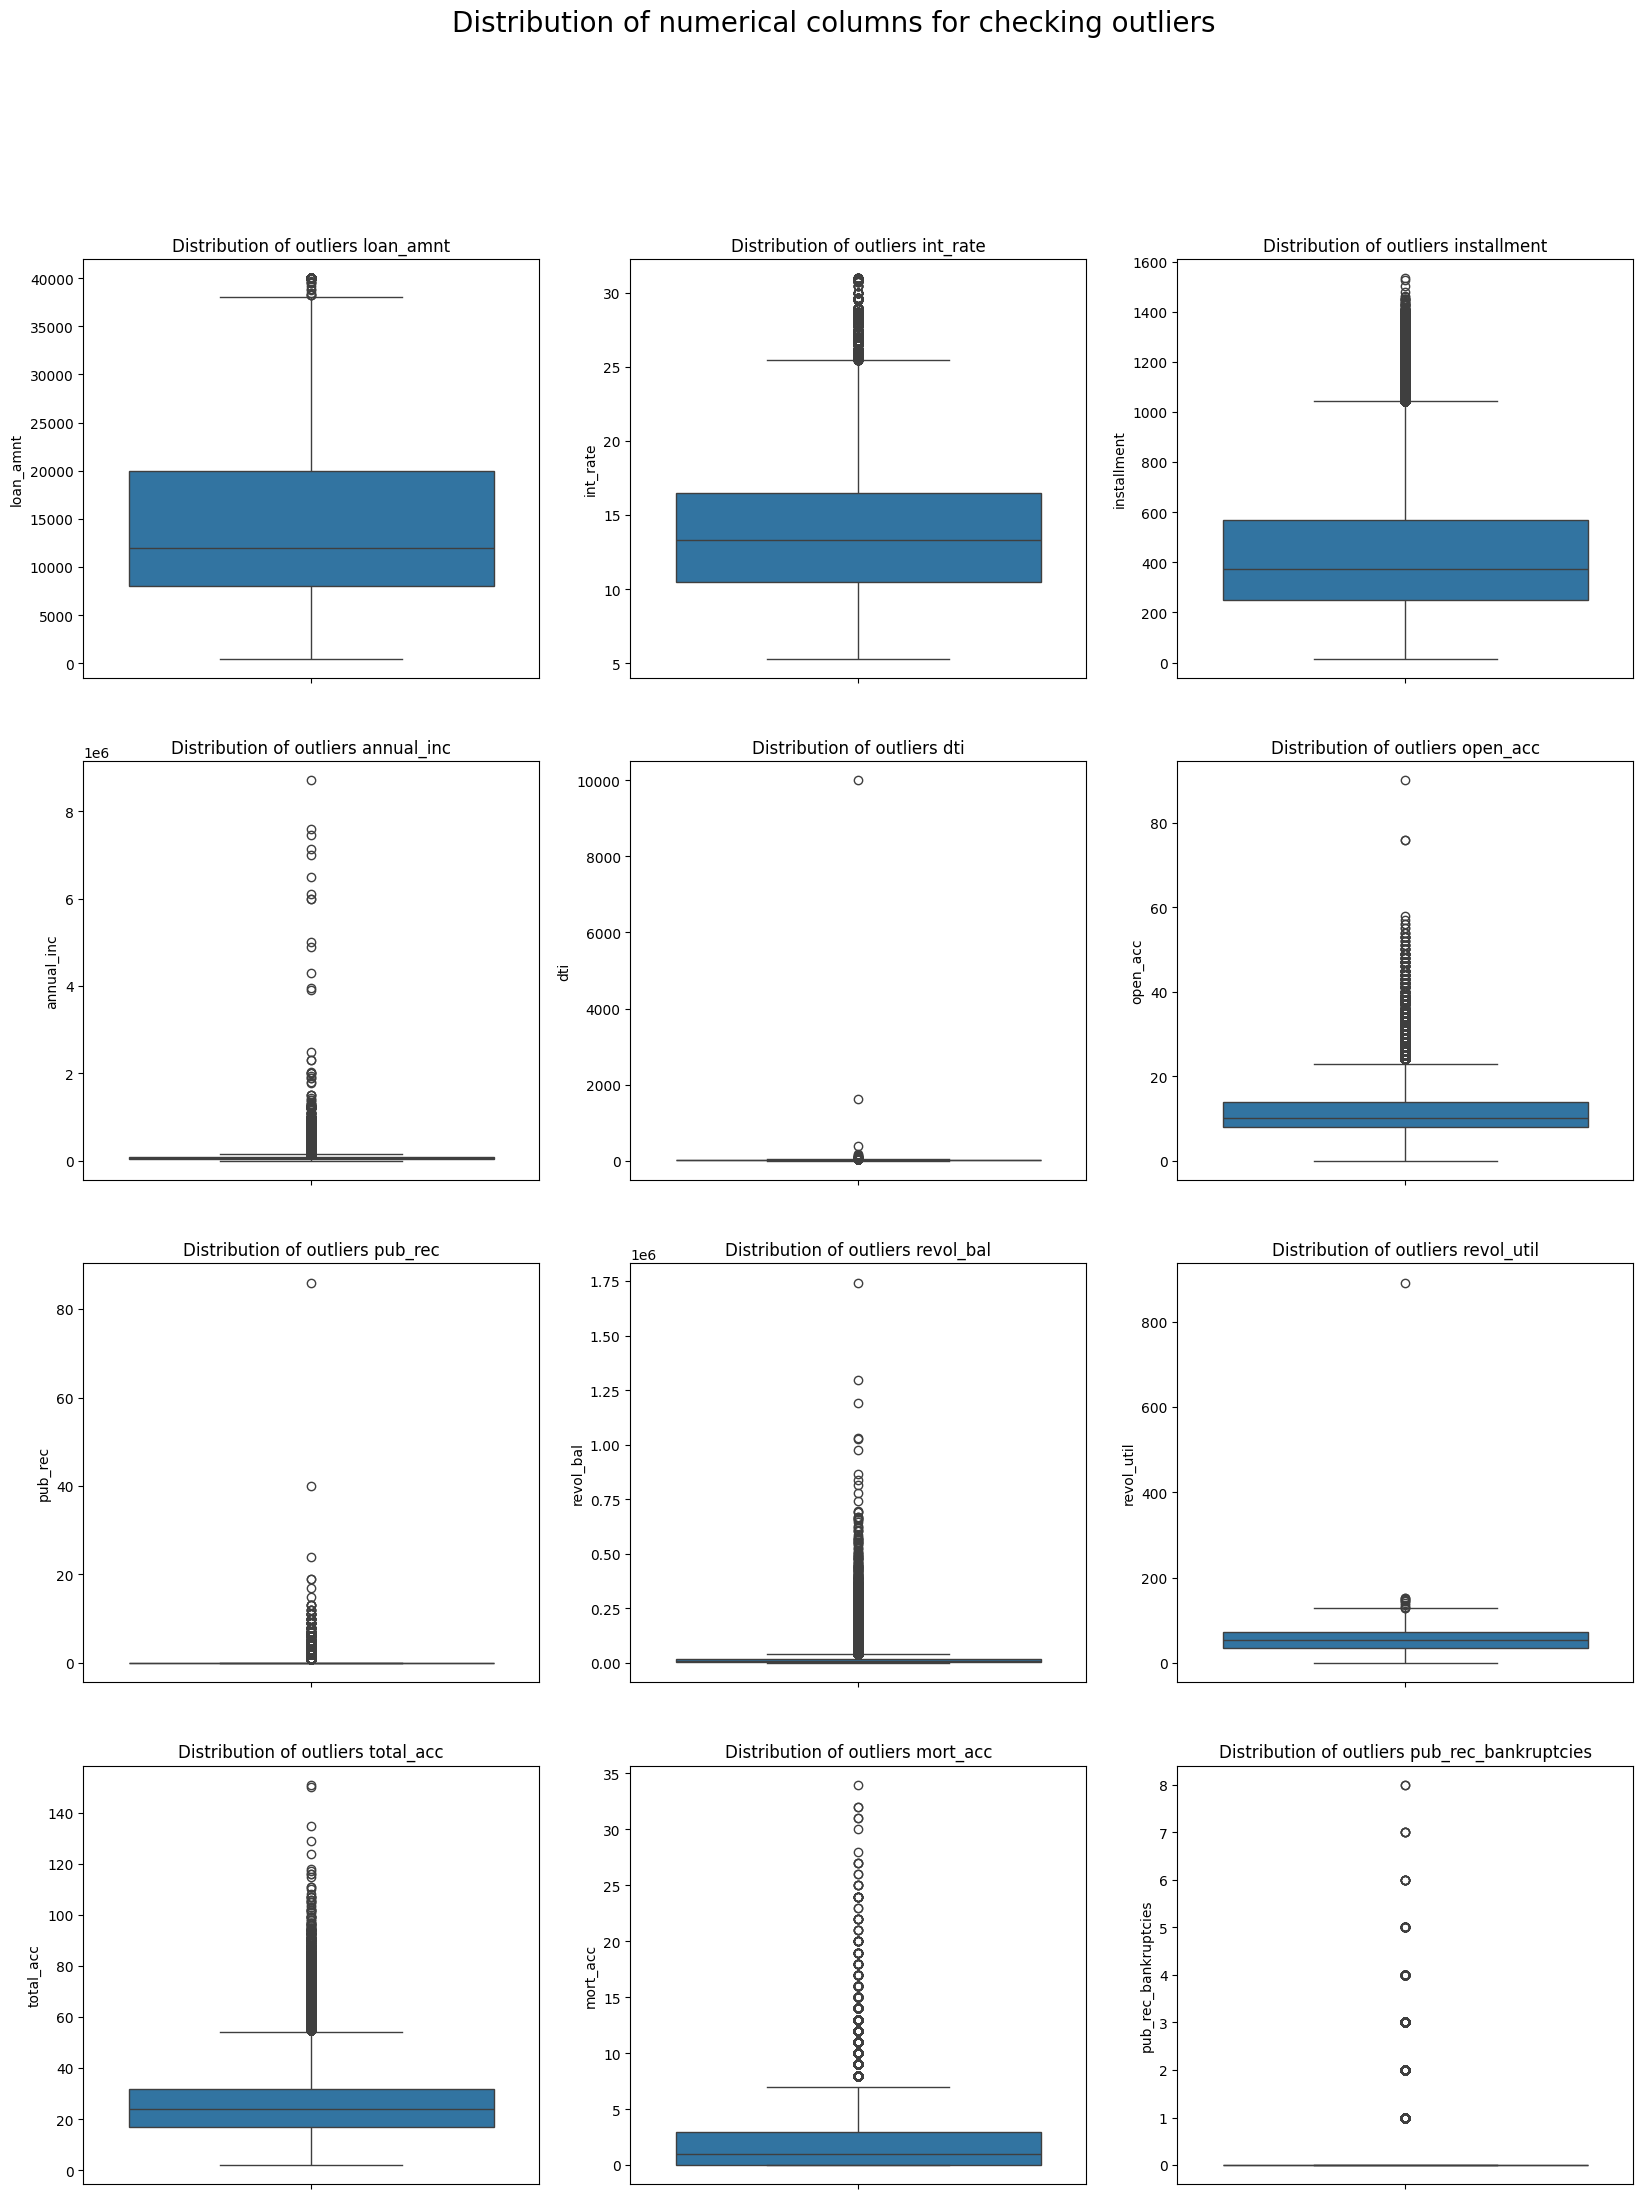

In [87]:
i = 1
plt.figure(figsize=(20,25)).suptitle('Distribution of numerical columns for checking outliers', fontsize=20)
for col in numerical_cols:
    plt.subplot(4,3,i)
    sns.boxplot(df[col])
    plt.title(f'Distribution of outliers {col}')
    i += 1
plt.show()

<h4> BIVARIATE ANALYSIS OF NUMERICAL COLUMNS:- </h4>

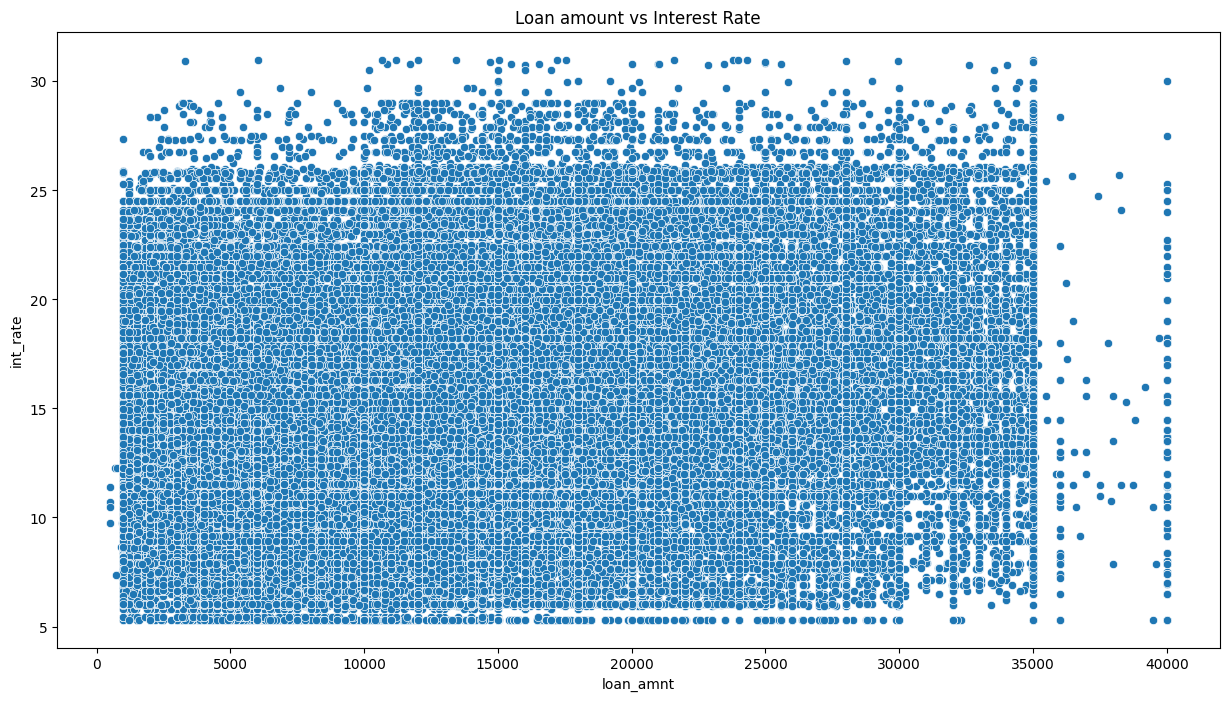

In [88]:
#Scatter plot between loan amount and int rate:-

plt.figure(figsize=(15,8))
sns.scatterplot(x = 'loan_amnt', y='int_rate', data=df)
plt.title('Loan amount vs Interest Rate')
plt.show()

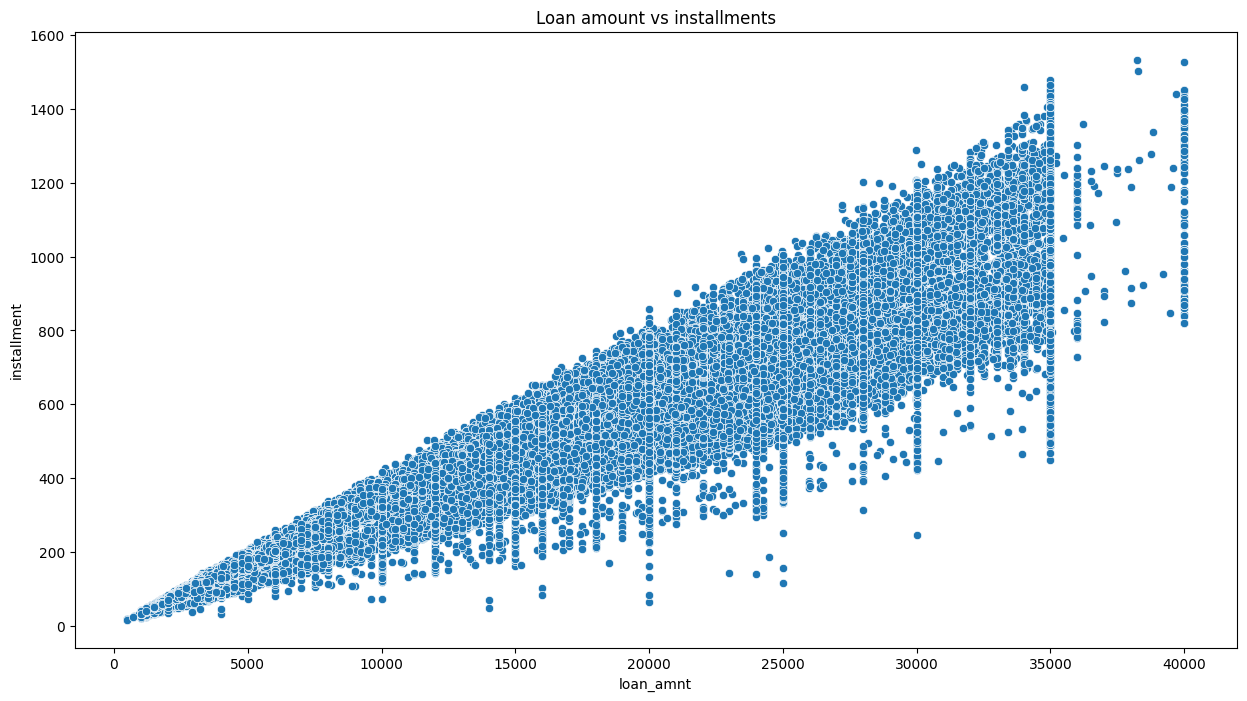

In [89]:
#Scatter plot between loan amount vs instalments:-

plt.figure(figsize=(15,8))
sns.scatterplot(x = 'loan_amnt', y='installment', data=df)
plt.title('Loan amount vs installments')
plt.show()

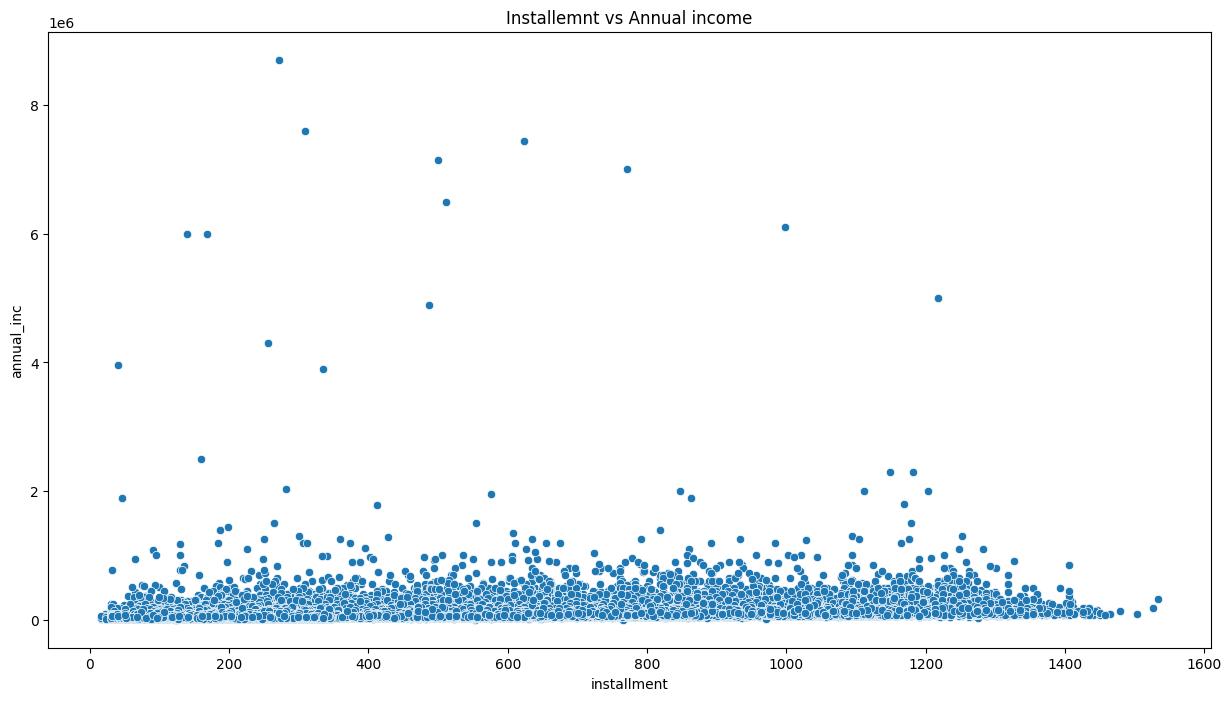

In [90]:
#Scatter plot between instalments vs annual income:-

plt.figure(figsize=(15,8))
sns.scatterplot(x = 'installment', y='annual_inc', data=df)
plt.title('Installemnt vs Annual income')
plt.show()

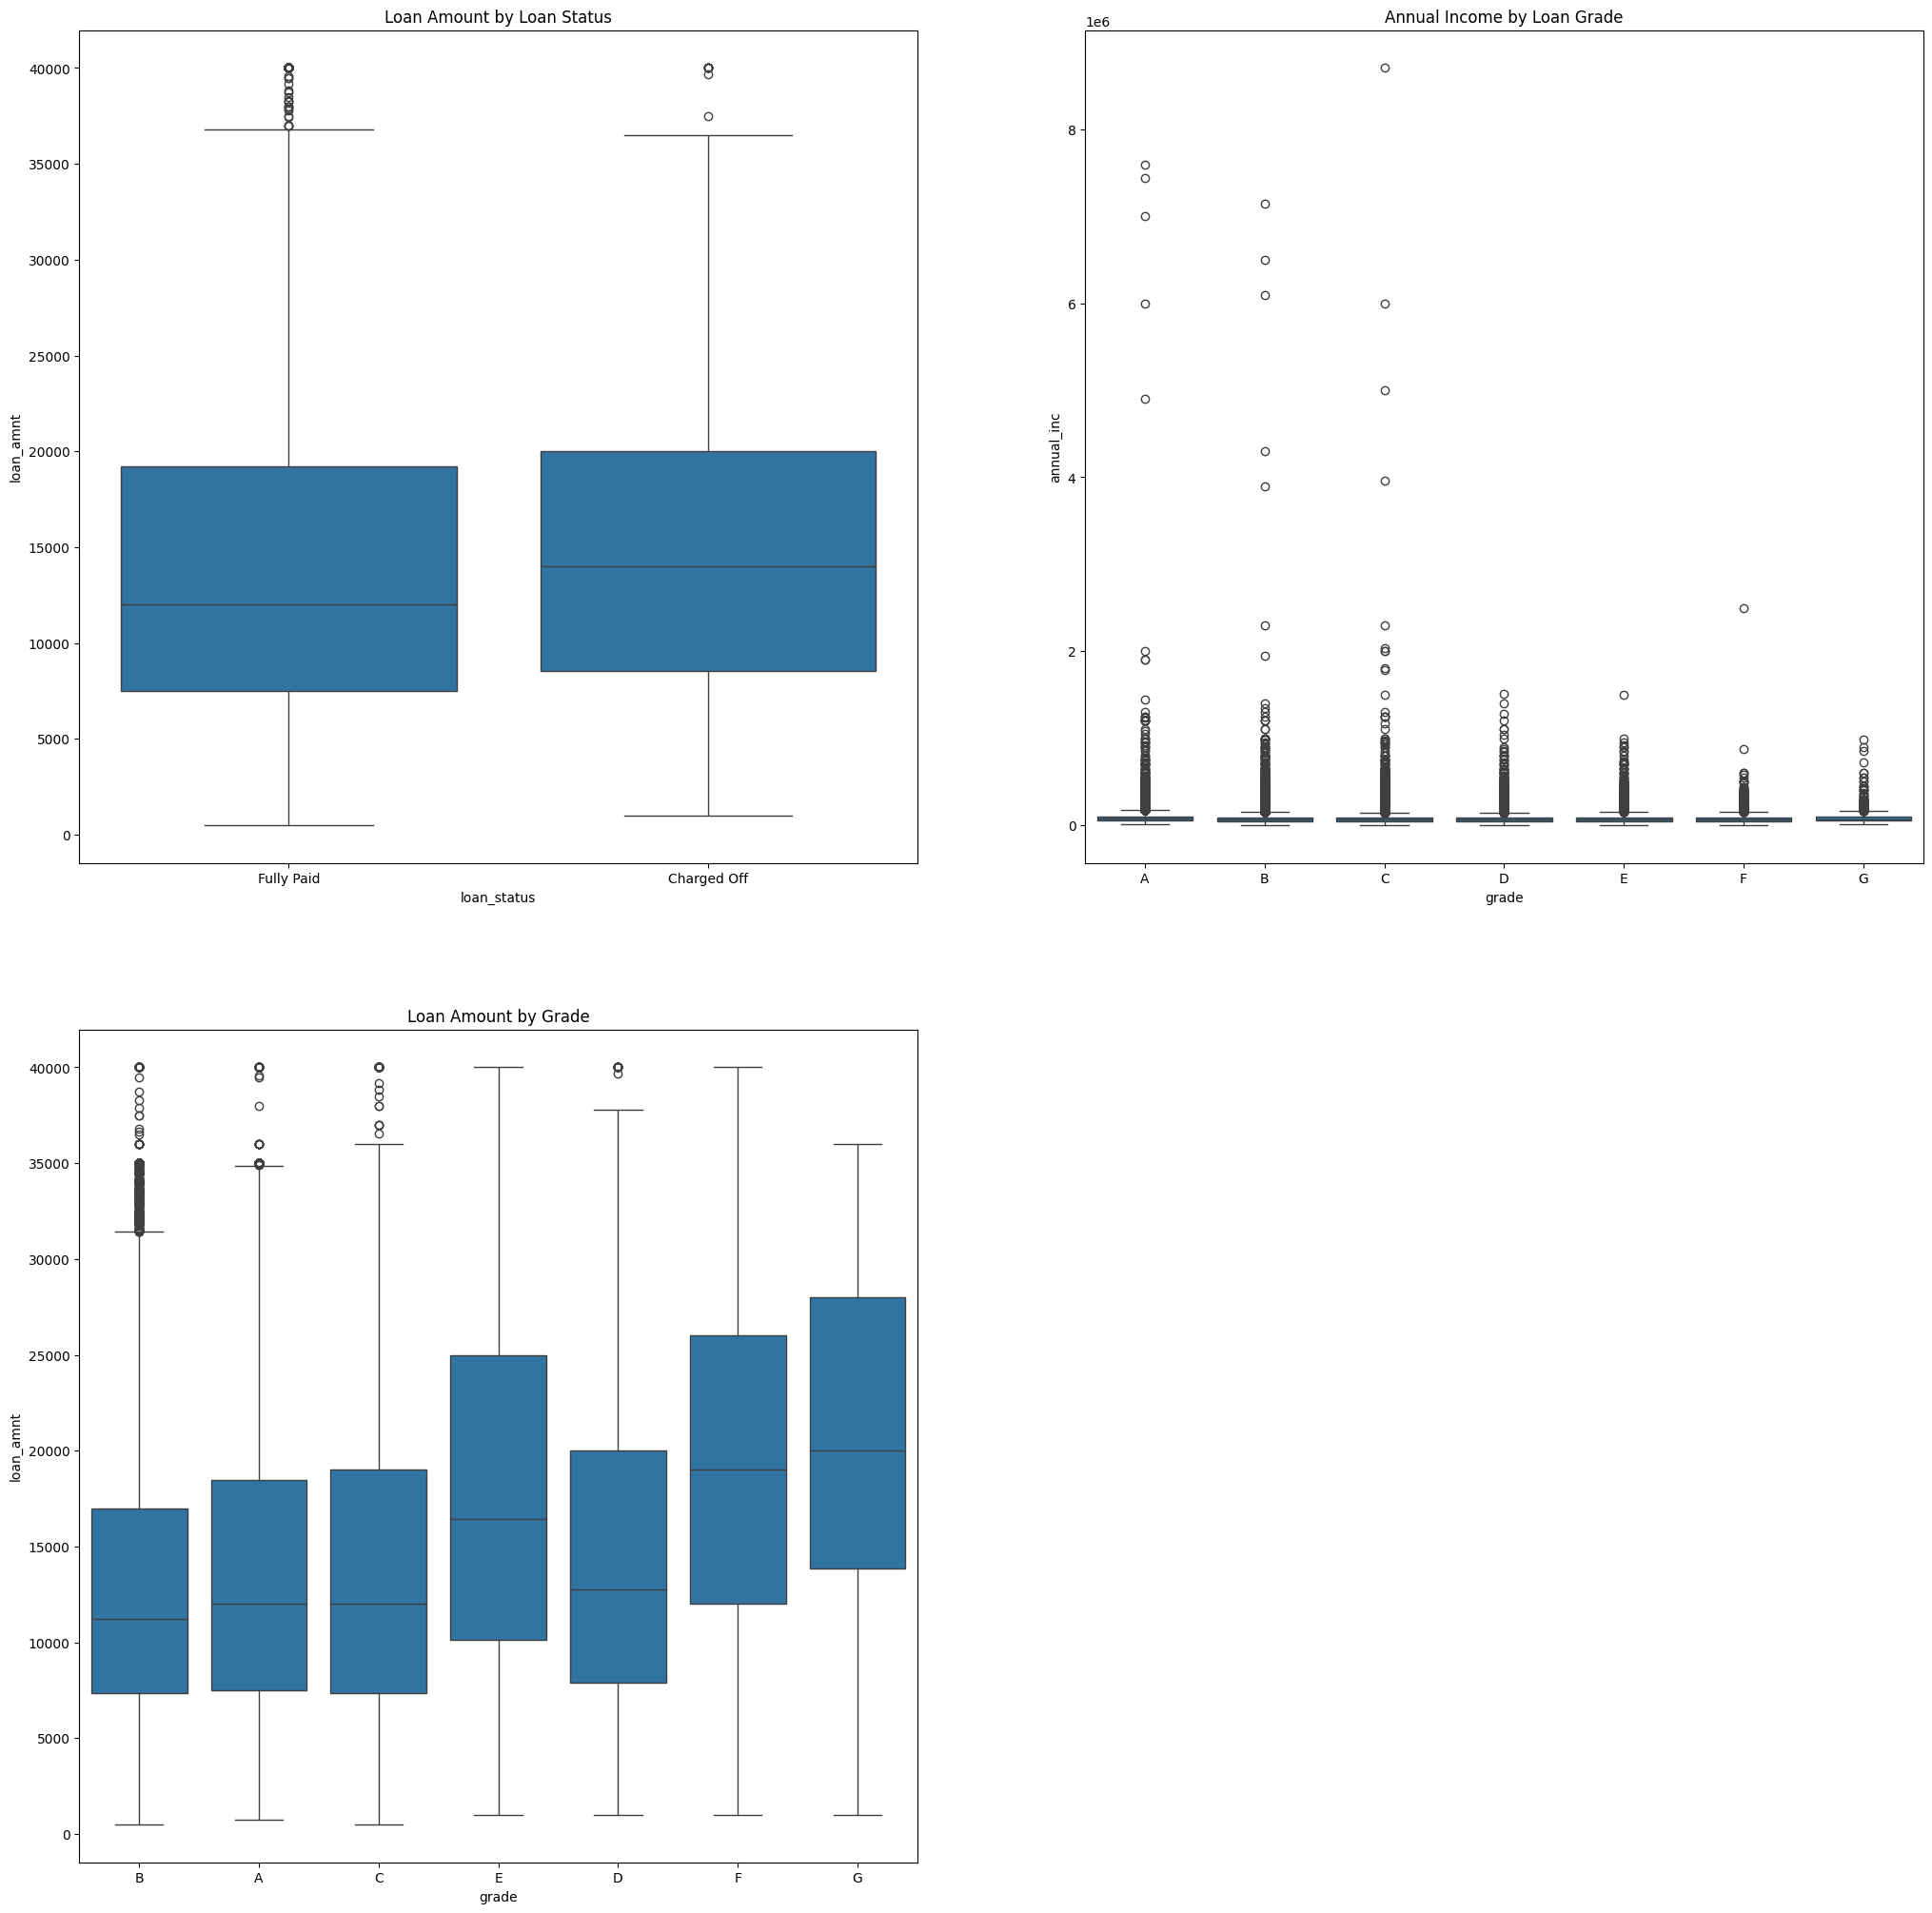

In [91]:
# Boxplots for comparing ouliers:-

plt.figure(figsize=(25,25))
plt.subplot(2,2,1)
sns.boxplot(x=df['loan_status'], y=df['loan_amnt'])
plt.title('Loan Amount by Loan Status')

plt.subplot(2,2,2)
sns.boxplot(x='grade', y='annual_inc', data=df, order=sorted(df['grade'].unique()))
plt.title('Annual Income by Loan Grade')
plt.subplot(2,2,3)
sns.boxplot(x='grade', y='loan_amnt', data=df)
plt.title('Loan Amount by Grade')
plt.show()

##### CORRELATION MATRIX:-

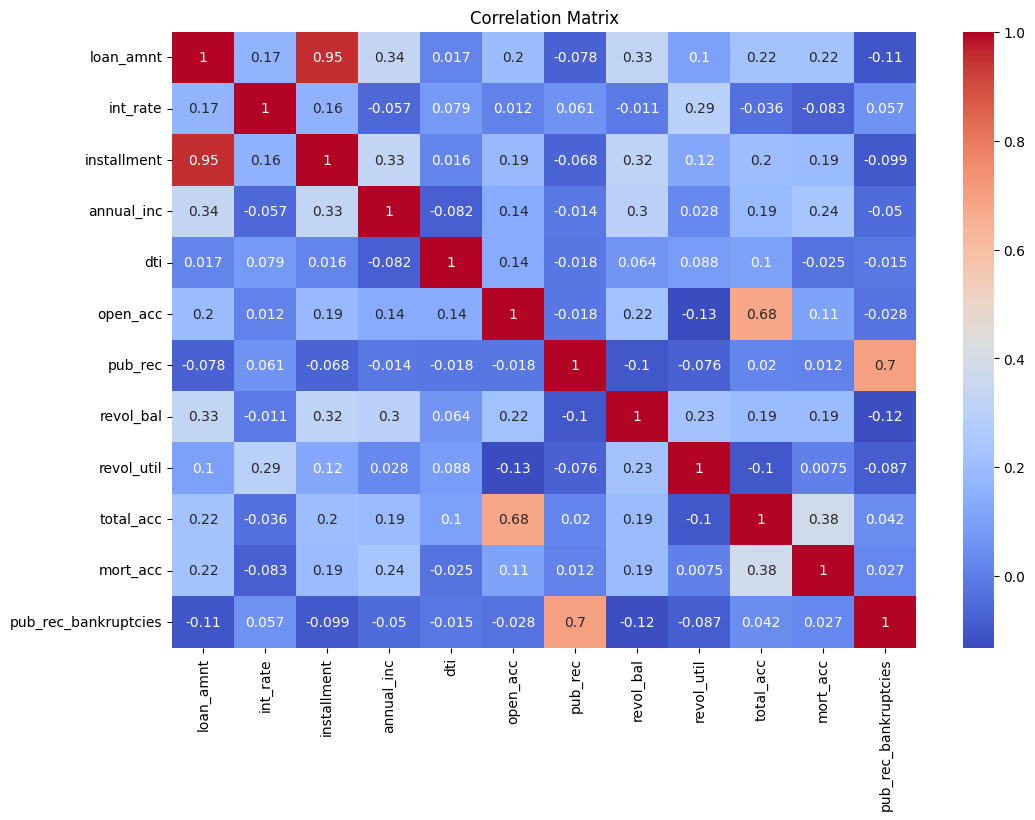

In [92]:
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<h3>Comments on Univariate and Bivariate Analysis of numerical columns</h3>

<h3>a. Range of Attributes</h3>
<ul>
  <li><strong>Loan Amount (loan_amnt):</strong> Ranges from $5,000 to $40,000, with most values around $10,000–$20,000.</li>
  <li><strong>Interest Rate (int_rate):</strong> Falls between 5% and 30%, mostly concentrated around 10%–20%.</li>
  <li><strong>Installment (installment):</strong> Ranges from $50 to $1,300, with most between $200–$400.</li>
  <li><strong>Annual Income (annual_inc):</strong> Varies widely from $20,000 to $500,000, with most incomes under $100,000.</li>
</ul>

<h3>b. Outliers of Various Attributes</h3>
<ul>
  <li><strong>Loan Amount (loan_amnt):</strong> Few outliers near $40,000, likely valid high loans.</li>
  <li><strong>Installment (installment):</strong> Outliers above $1,000 tied to larger loans.</li>
  <li><strong>Annual Income (annual_inc):</strong> Significant outliers above $300,000, representing high earners.</li>
</ul>

<h3>c. Distribution and Relationships</h3>
<ul>
  <li><strong>Loan Amount vs. Interest Rate:</strong> Higher loan amounts generally have lower interest rates.</li>
  <li><strong>Loan Amount vs. Installments:</strong> Positive linear relationship—larger loans mean higher payments.</li>
  <li><strong>Installments vs. Annual Income:</strong> Higher incomes correlate with larger installments, but most are moderate.</li>
  <li><strong>Loan Status vs. Loan Amount:</strong> Defaulted loans tend to have higher loan amounts.</li>
  <li><strong>Loan Grade vs. Annual Income:</strong> Higher grades (A, B) link to higher incomes and better loan terms.</li>
</ul>


<h4> UNIVARIATE ANALYSIS OF CATEGORICAL COLUMNS:- </h4>

In [93]:
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() <= 35:
        print(col)

less_unique_value_cat_cols = df[['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type']]
less_unique_value_cat_cols

term
grade
sub_grade
emp_length
home_ownership
verification_status
loan_status
purpose
initial_list_status
application_type


,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,initial_list_status,application_type
0,36 months,B,B4,10+ years,RENT,Not Verified,Fully Paid,vacation,w,INDIVIDUAL
1,36 months,B,B5,4 years,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL
2,36 months,B,B3,< 1 year,RENT,Source Verified,Fully Paid,credit_card,f,INDIVIDUAL
3,36 months,A,A2,6 years,RENT,Not Verified,Fully Paid,credit_card,f,INDIVIDUAL
4,60 months,C,C5,9 years,MORTGAGE,Verified,Charged Off,credit_card,f,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,2 years,RENT,Source Verified,Fully Paid,debt_consolidation,w,INDIVIDUAL
396026,36 months,C,C1,5 years,MORTGAGE,Source Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL
396027,36 months,B,B1,10+ years,RENT,Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL
396028,60 months,C,C2,10+ years,MORTGAGE,Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL


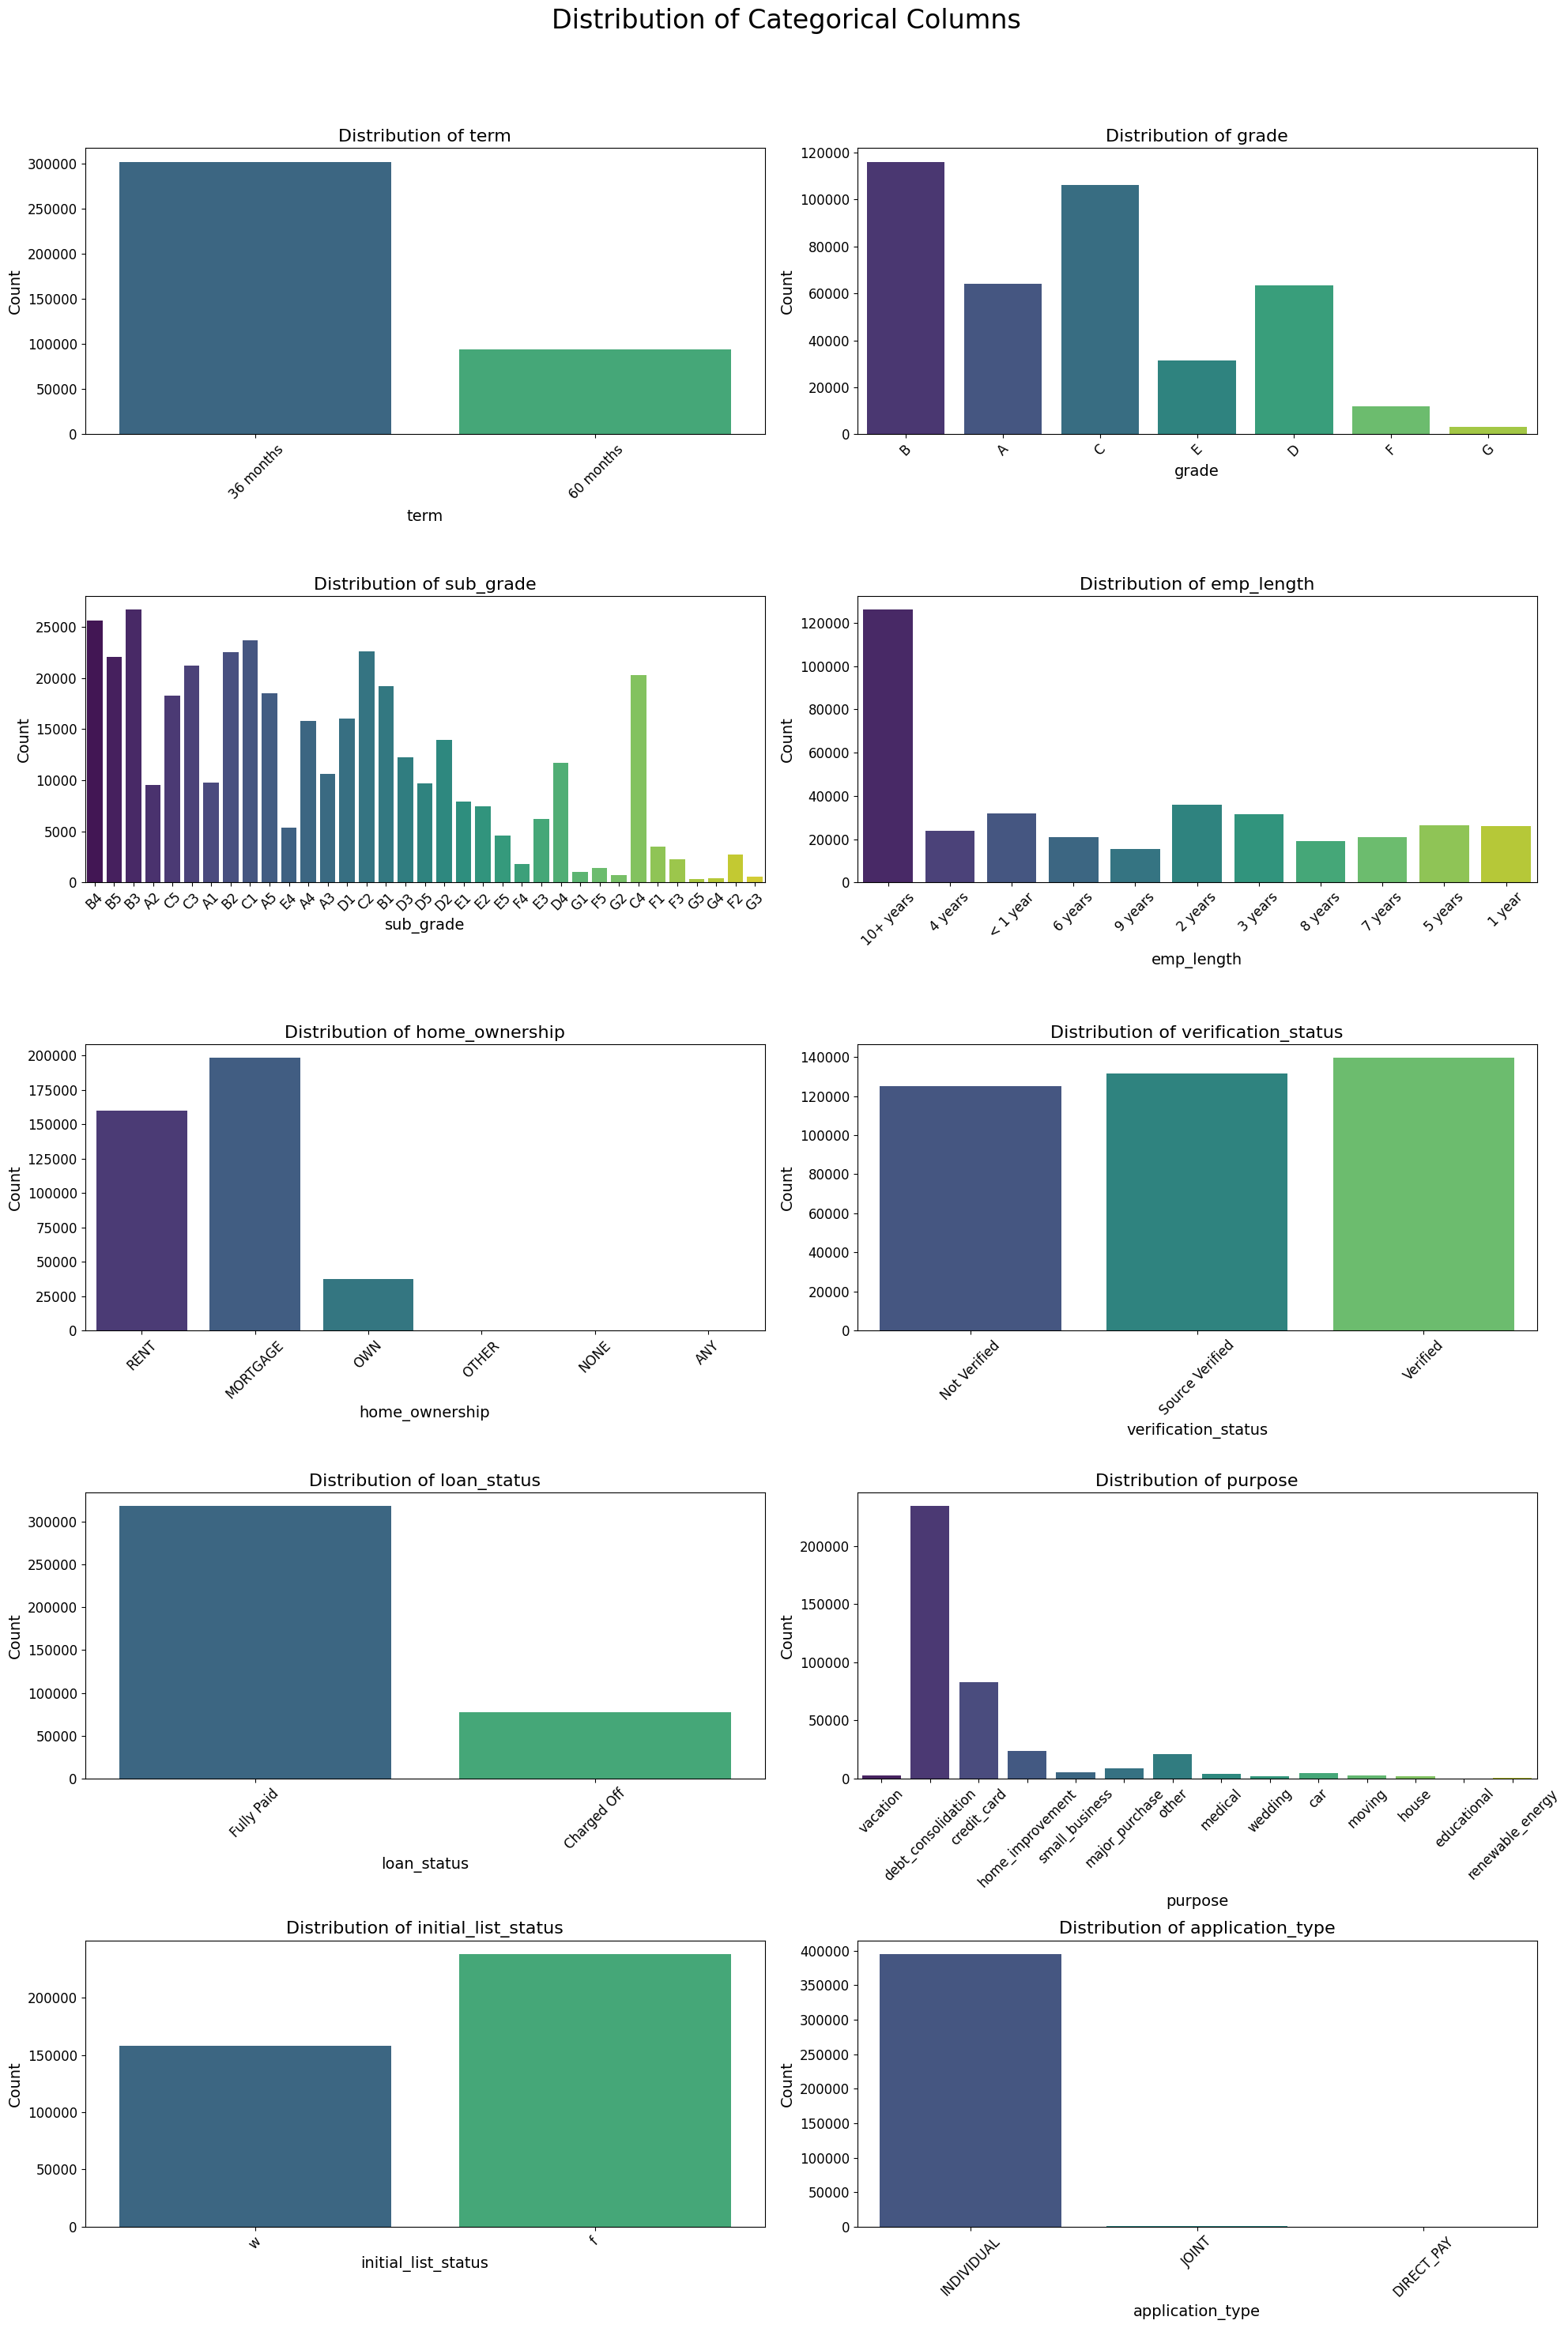

In [94]:
# Visualizing distribution of categorical columns:-

i = 1
plt.figure(figsize=(20, 30))  
plt.suptitle('Distribution of Categorical Columns', fontsize=24, y=0.98)
for col in less_unique_value_cat_cols:
    plt.subplot(5, 2, i)
    sns.countplot(x=df[col], palette="viridis")
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.title(f'Distribution of {col}', fontsize=16)
    i += 1

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


<h4> BIVARIATE ANALYSIS OF CATEGORICAL COLUMNS:- </h4>

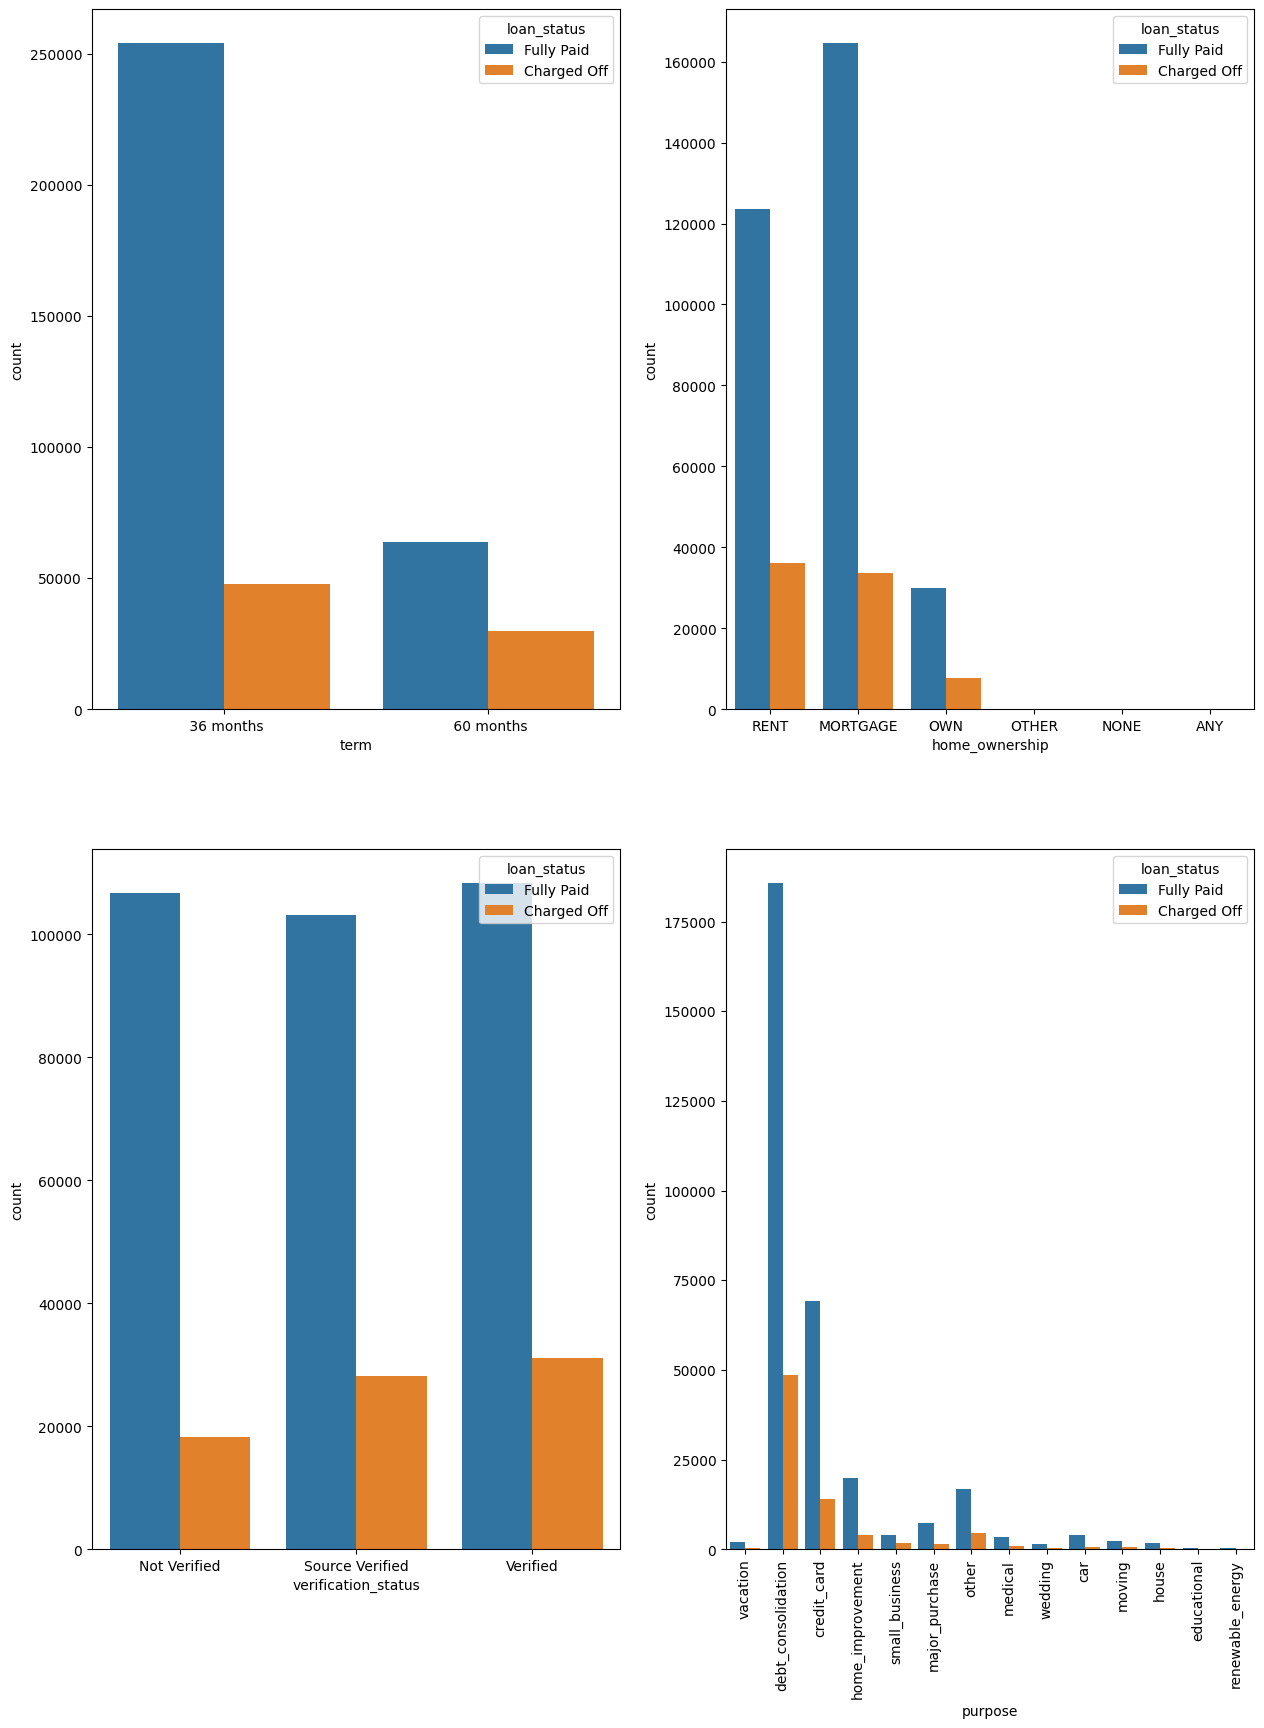

In [95]:
plt.figure(figsize=(15,20))

plt.subplot(2,2,1)
sns.countplot(x='term', data=df, hue='loan_status')
plt.subplot(2,2,2)
sns.countplot(x='home_ownership', data=df, hue='loan_status')
plt.subplot(2,2,3)
sns.countplot(x='verification_status', data=df, hue='loan_status')
plt.subplot(2,2,4)
sns.countplot(x='purpose', data=df, hue='loan_status')
plt.xticks(rotation=90)

plt.show()

<h3>Comments on Univariate and Bivariate Analysis of categorical columns</h3>

<h3>a. Range of Attributes</h3>
<ul>
  <li><strong>Term:</strong> Loan terms are either <strong>36 months</strong> or <strong>60 months</strong>, with 36 months being more common.</li>
  <li><strong>Home Ownership:</strong> Most borrowers fall into <strong>"RENT"</strong> or <strong>"MORTGAGE"</strong>, while <strong>"OWN"</strong> is less common.</li>
  <li><strong>Verification Status:</strong> Borrowers are distributed across <strong>"Verified"</strong>, <strong>"Source Verified"</strong>, and <strong>"Not Verified"</strong> categories.</li>
  <li><strong>Purpose:</strong> Loans are mainly for <strong>"debt consolidation"</strong> and <strong>"credit card"</strong> purposes, while rare purposes include <strong>"vacation"</strong> and <strong>"renewable energy."</strong></li>
</ul>

<h3>b. Outliers of Various Attributes</h3>
<ul>
  <li><strong>Purpose:</strong> Rare loan purposes like <strong>"vacation"</strong> and <strong>"renewable energy"</strong> are outliers with very few instances.</li>
  <li><strong>Home Ownership:</strong> Categories like <strong>"ANY"</strong> are rarely seen, making them outliers.</li>
</ul>

<h3>c. Distribution and Relationships</h3>
<ul>
  <li><strong>Term vs Loan Status:</strong> Loans with a <strong>60-month term</strong> have a higher proportion of defaults compared to 36-month loans.</li>
  <li><strong>Home Ownership vs Loan Status:</strong> Borrowers with <strong>"RENT"</strong> or <strong>"MORTGAGE"</strong> ownership are more likely to default, while <strong>"OWN"</strong> is less risky.</li>
  <li><strong>Verification Status vs Loan Status:</strong> Verification status does not significantly affect default rates, with similar patterns across all categories.</li>
  <li><strong>Purpose vs Loan Status:</strong> Loans for <strong>"debt consolidation"</strong> and <strong>"small business"</strong> have higher default rates, while <strong>"credit card"</strong> loans perform better with fewer defaults.</li>
</ul>



<hr>

<h1> 2. DATA PREPROCESSING :- </h1>

<h3> (a) DUPLICATE VALUE CHECK:- </h3>

In [96]:
# Check for Duplicates
duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", duplicates)

# Remove Duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Number of Duplicate Rows: 0
Shape after removing duplicates: (396030, 27)


<h3>(b) MISSING VALUE TREATEMENT:- </h3>

In [159]:
# Filling numerical missing values with the median
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Filling categorical missing values with the mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing Values After Treatment:\n", df.isnull().sum().sum())



Missing Values After Treatment:
 0


<h3>(c) OUTLIER TREATMENT :- </h3>

In [98]:
# Capping outliers using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)


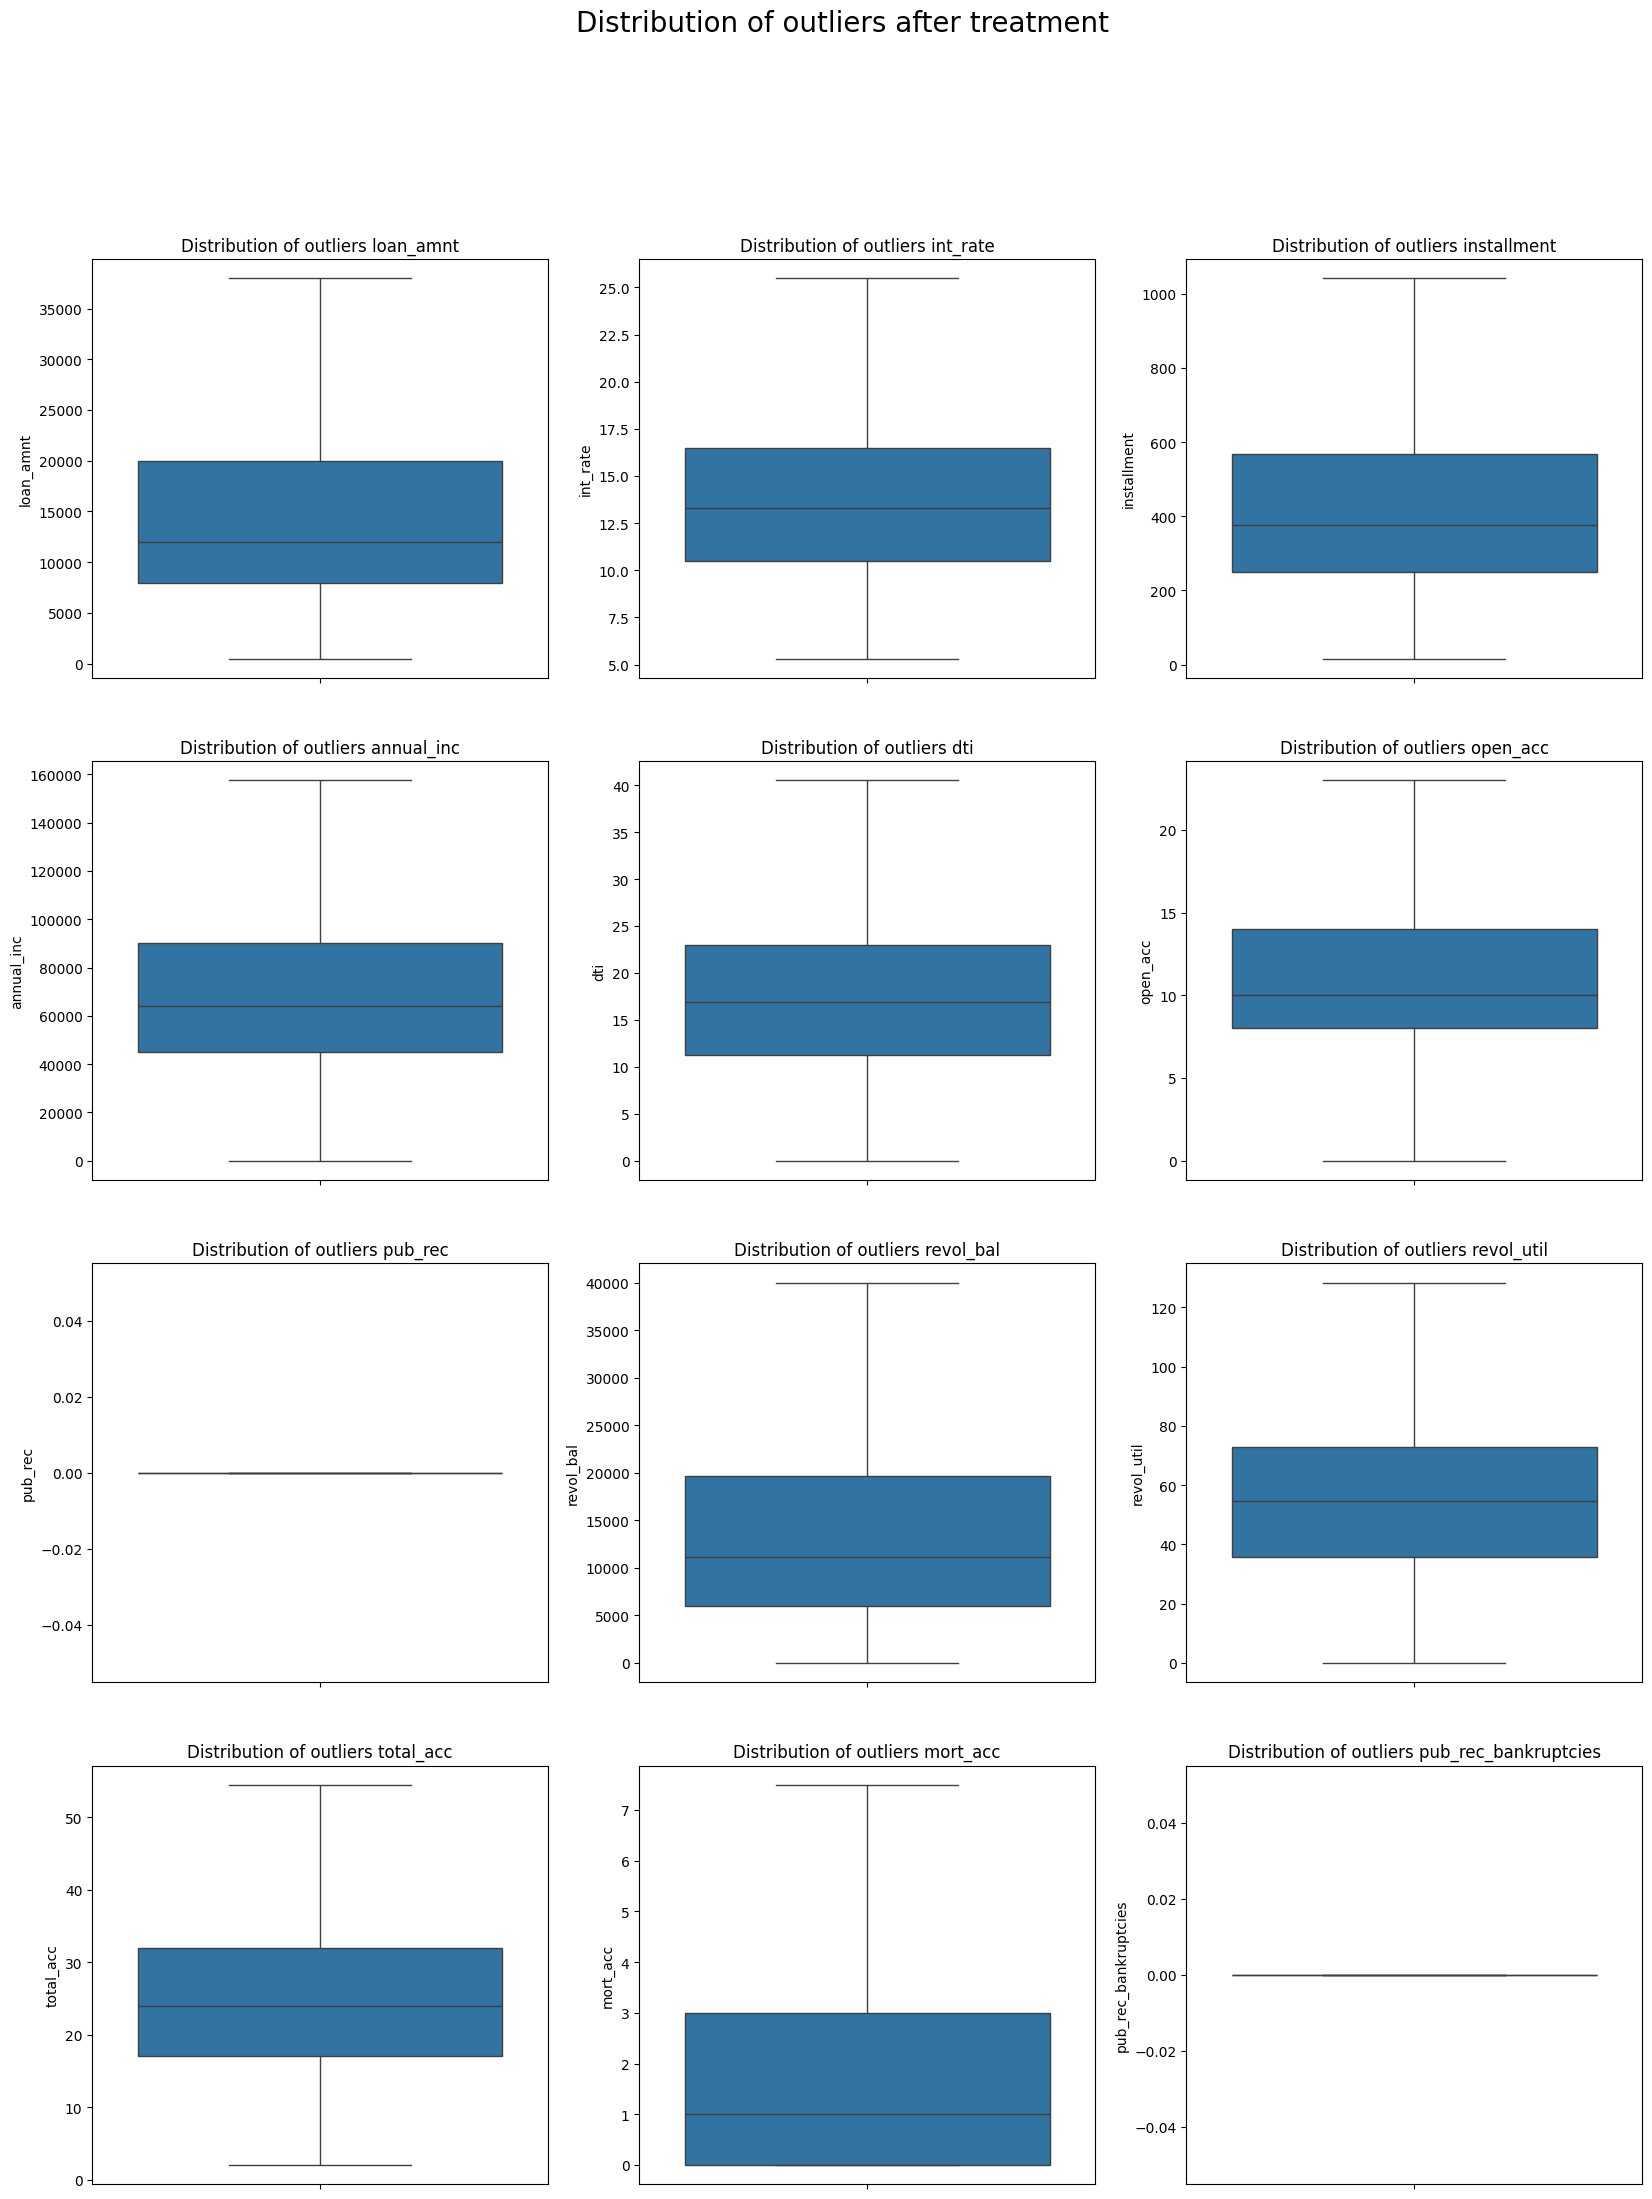

In [99]:
# Visualizing Outliers after treatment

i = 1
plt.figure(figsize=(20,25)).suptitle('Distribution of outliers after treatment', fontsize=20)
for col in numerical_cols:
    plt.subplot(4,3,i)
    sns.boxplot(df[col])
    plt.title(f'Distribution of outliers {col}')
    i += 1
plt.show()
    

<h3>(d) ENCODING CATEGORICAL COLUMNS:- </h3>

In [100]:
simple_text_columns = df[['emp_title', 'title', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'grade']]
simple_text_columns

,emp_title,title,home_ownership,verification_status,purpose,initial_list_status,application_type,grade
0,Marketing,Vacation,RENT,Not Verified,vacation,w,INDIVIDUAL,B
1,Credit analyst,Debt consolidation,MORTGAGE,Not Verified,debt_consolidation,f,INDIVIDUAL,B
2,Statistician,Credit card refinancing,RENT,Source Verified,credit_card,f,INDIVIDUAL,B
3,Client Advocate,Credit card refinancing,RENT,Not Verified,credit_card,f,INDIVIDUAL,A
4,Destiny Management Inc.,Credit Card Refinance,MORTGAGE,Verified,credit_card,f,INDIVIDUAL,C
...,...,...,...,...,...,...,...,...
396025,licensed bankere,Debt consolidation,RENT,Source Verified,debt_consolidation,w,INDIVIDUAL,B
396026,Agent,Debt consolidation,MORTGAGE,Source Verified,debt_consolidation,f,INDIVIDUAL,C
396027,City Carrier,pay off credit cards,RENT,Verified,debt_consolidation,f,INDIVIDUAL,B
396028,"Gracon Services, Inc",Loanforpayoff,MORTGAGE,Verified,debt_consolidation,f,INDIVIDUAL,C


In [101]:
from category_encoders import TargetEncoder

In [102]:
df['loan_status'] = df['loan_status'].apply(lambda x:1 if x=='Fully Paid' else 0)

In [103]:
target = df['loan_status']
target

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int64

In [104]:
for i in simple_text_columns:
    encoder = TargetEncoder(cols=i)
    df[i] = encoder.fit_transform(df[i], target)

In [105]:
df.select_dtypes(include='object')

,term,sub_grade,emp_length,issue_d,earliest_cr_line,address
0,36 months,B4,10+ years,Jan-2015,Jun-1990,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B5,4 years,Jan-2015,Jul-2004,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B3,< 1 year,Jan-2015,Aug-2007,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A2,6 years,Nov-2014,Sep-2006,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C5,9 years,Apr-2013,Mar-1999,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...
396025,60 months,B4,2 years,Oct-2015,Nov-2004,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,36 months,C1,5 years,Feb-2015,Feb-2006,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,36 months,B1,10+ years,Oct-2013,Mar-1997,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,60 months,C2,10+ years,Aug-2012,Nov-1990,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [106]:
import re
def encode(df, columns):
    df[columns] = df[columns].applymap(lambda x: re.sub(r"[^\d\s]", "", x))
    df[columns] = df[columns].astype(int)
    return df[columns]

In [107]:
columns_to_encode = ['term', 'sub_grade', 'emp_length', 'issue_d', 'earliest_cr_line']

In [108]:
encode(df, columns_to_encode)

,term,sub_grade,emp_length,issue_d,earliest_cr_line
0,36,4,10,2015,1990
1,36,5,4,2015,2004
2,36,3,1,2015,2007
3,36,2,6,2014,2006
4,60,5,9,2013,1999
...,...,...,...,...,...
396025,60,4,2,2015,2004
396026,36,1,5,2015,2006
396027,36,1,10,2013,1997
396028,60,2,10,2012,1990


In [109]:
df.select_dtypes(include=['float64', 'int64'])

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,0.874270,4,0.752860,10,0.773378,117000.0,...,1990,16.0,0.0,36369.0,41.8,25.0,0.799245,0.803913,0.0,0.0
1,8000.0,36,11.99,265.68,0.874270,5,0.782678,4,0.830439,65000.0,...,2004,17.0,0.0,20131.0,53.3,27.0,0.806940,0.803913,3.0,0.0
2,15600.0,36,10.49,506.97,0.874270,3,0.808007,1,0.773378,43057.0,...,2007,13.0,0.0,11987.0,92.2,26.0,0.806940,0.803913,0.0,0.0
3,7200.0,36,6.49,220.65,0.937121,2,0.829389,6,0.773378,54000.0,...,2006,6.0,0.0,5472.0,21.5,13.0,0.806940,0.803913,0.0,0.0
4,24375.0,60,17.27,609.33,0.788191,5,0.699281,9,0.830439,55000.0,...,1999,13.0,0.0,24584.0,69.8,43.0,0.806940,0.803913,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,0.874270,4,0.829389,2,0.773378,40000.0,...,2004,6.0,0.0,1990.0,34.3,23.0,0.799245,0.803913,0.0,0.0
396026,21000.0,36,12.29,700.42,0.788191,1,0.779570,5,0.830439,110000.0,...,2006,6.0,0.0,40012.5,95.7,8.0,0.806940,0.803913,1.0,0.0
396027,5000.0,36,9.99,161.32,0.874270,1,0.731997,10,0.773378,56500.0,...,1997,15.0,0.0,32704.0,66.9,23.0,0.806940,0.803913,0.0,0.0
396028,21000.0,60,15.31,503.02,0.788191,2,0.829389,10,0.830439,64000.0,...,1990,9.0,0.0,15704.0,53.8,20.0,0.806940,0.803913,5.0,0.0


In [110]:
df.select_dtypes(include=['object'])

,address
0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...
396025,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [111]:
def encode_zipcodes(df, address_column):
    df[address_column] = df[address_column].apply(lambda x: re.search(r"\b\d{5}\b", x).group() if re.search(r"\b\d{5}\b", x) else "")
    df[address_column] = df[address_column].astype(int)
    return df[address_column]

In [112]:
encode_zipcodes(df, 'address')

0         22690
1          5113
2         87025
3           813
4         11650
          ...  
396025    12951
396026     5113
396027    70466
396028    29597
396029    48052
Name: address, Length: 396030, dtype: int64

<h3>(e) CHECKING IMBALANCE DATASET AND BALANCING IT:- </h3>

In [113]:
target = df['loan_status']
target

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int64

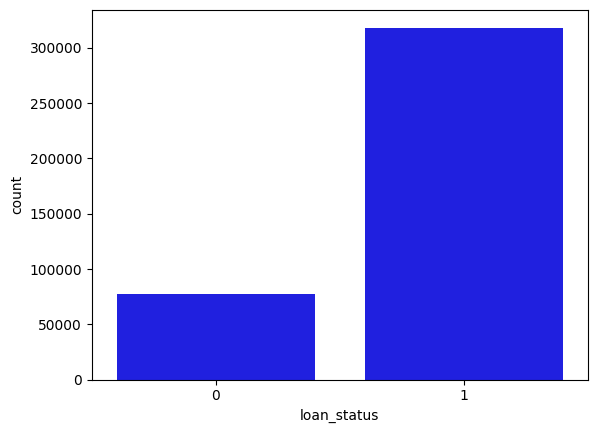

In [114]:
sns.countplot(x=target, color='blue')
plt.show()

In [115]:
target.value_counts()

loan_status
1    318357
0     77673
Name: count, dtype: int64

In [116]:
from imblearn.over_sampling import SMOTE

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X = df.drop('loan_status', axis=1)
X

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,0.874270,4,0.752860,10,0.773378,117000.0,...,16.0,0.0,36369.0,41.8,25.0,0.799245,0.803913,0.0,0.0,22690
1,8000.0,36,11.99,265.68,0.874270,5,0.782678,4,0.830439,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0.806940,0.803913,3.0,0.0,5113
2,15600.0,36,10.49,506.97,0.874270,3,0.808007,1,0.773378,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0.806940,0.803913,0.0,0.0,87025
3,7200.0,36,6.49,220.65,0.937121,2,0.829389,6,0.773378,54000.0,...,6.0,0.0,5472.0,21.5,13.0,0.806940,0.803913,0.0,0.0,813
4,24375.0,60,17.27,609.33,0.788191,5,0.699281,9,0.830439,55000.0,...,13.0,0.0,24584.0,69.8,43.0,0.806940,0.803913,1.0,0.0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,0.874270,4,0.829389,2,0.773378,40000.0,...,6.0,0.0,1990.0,34.3,23.0,0.799245,0.803913,0.0,0.0,12951
396026,21000.0,36,12.29,700.42,0.788191,1,0.779570,5,0.830439,110000.0,...,6.0,0.0,40012.5,95.7,8.0,0.806940,0.803913,1.0,0.0,5113
396027,5000.0,36,9.99,161.32,0.874270,1,0.731997,10,0.773378,56500.0,...,15.0,0.0,32704.0,66.9,23.0,0.806940,0.803913,0.0,0.0,70466
396028,21000.0,60,15.31,503.02,0.788191,2,0.829389,10,0.830439,64000.0,...,9.0,0.0,15704.0,53.8,20.0,0.806940,0.803913,5.0,0.0,29597


In [119]:
y = target
y

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int64

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [121]:
X_train.shape, y_train.shape

((316824, 26), (316824,))

In [122]:
X_test.shape, y_test.shape

((79206, 26), (79206,))

In [123]:
print('Before SMOTE:')
print(y_train.value_counts())

Before SMOTE:
loan_status
1    254546
0     62278
Name: count, dtype: int64


In [124]:
smt = SMOTE()

In [125]:
X_sm, y_sm = smt.fit_resample(X_train, y_train)

In [126]:
print('After Oversampling:')
print(y_sm.value_counts())

After Oversampling:
loan_status
0    254546
1    254546
Name: count, dtype: int64


<h3>(f) SCALING:- </h3>

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_train

array([[ 1.30204094,  1.79246117,  0.26948365, ..., -0.36502955,
         0.        ,  1.98953353],
       [-0.55162401, -0.55789214, -0.14405341, ...,  0.15399981,
         0.        ,  0.33583655],
       [-0.61141966, -0.55789214, -1.17789605, ...,  0.15399981,
         0.        , -0.80002954],
       ...,
       [ 1.89999738, -0.55789214, -0.21147793, ...,  0.67302918,
         0.        ,  0.33583655],
       [-0.01346322, -0.55789214,  0.15261448, ..., -0.88405892,
         0.        , -1.40357388],
       [-0.2526458 ,  1.79246117, -0.64748983, ..., -0.36502955,
         0.        ,  0.03420929]])

In [129]:
scaled_test = scaler.fit_transform(X_test)
scaled_test

array([[-1.33492235, -0.55830555,  1.69945301, ..., -0.88418951,
         0.        ,  1.07186616],
       [-0.49417446, -0.55830555,  0.37791462, ..., -0.88418951,
         0.        ,  1.15161136],
       [ 1.30742816, -0.55830555, -0.59466559, ...,  0.6694722 ,
         0.        ,  0.88764099],
       ...,
       [-0.00173641, -0.55830555,  0.40042805, ..., -0.36630227,
         0.        , -0.57859143],
       [-0.68634541, -0.55830555,  0.30587164, ..., -0.88418951,
         0.        , -1.16041992],
       [-1.27486893, -0.55830555,  0.48823043, ..., -0.36630227,
         0.        , -1.37086467]])

In [130]:
X_train[X_train.columns] = scaled_train

In [131]:
X_train.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
44819,1.302041,1.792461,0.269484,0.683964,-0.903498,0.019167,-0.866156,1.072487,-1.120126,1.107505,...,-0.040511,0.0,-0.726404,-0.503233,1.204289,0.815173,0.00832,-0.365030,0.0,1.989534
41622,-0.551624,-0.557892,-0.144053,-0.449736,-0.153026,-0.691745,-0.866156,1.072487,0.976899,-0.903484,...,-1.096492,0.0,2.415820,1.180859,-0.462195,0.815173,0.00832,0.154000,0.0,0.335837
362594,-0.611420,-0.557892,-1.177896,-0.601190,0.687356,-1.402658,0.284899,1.072487,0.976899,-0.612037,...,0.593078,0.0,-0.497904,-1.253084,-0.462195,-1.226733,0.00832,0.154000,0.0,-0.800030
228739,0.309433,1.792461,2.103431,0.177051,-2.262517,-1.402658,1.011927,0.224008,0.976899,-0.087431,...,0.381882,0.0,0.871600,0.062229,0.064063,0.815173,0.00832,0.154000,0.0,-1.375498
210327,-1.352886,-0.557892,0.487490,-1.372940,-0.153026,0.019167,0.572679,0.789661,0.976899,2.521026,...,1.860255,0.0,1.761768,1.512761,1.642838,-1.226733,0.00832,2.749147,0.0,-1.375498


In [132]:
X_test[X_test.columns] = scaled_test

In [133]:
X_test.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
286468,-1.334922,-0.558306,1.699453,-1.312650,-1.735729,0.023568,-1.906617,-1.189272,-1.122583,-1.337380,...,-0.458872,0.0,-1.029999,-0.857177,-1.423061,0.812178,0.009744,-0.884190,0.0,1.071866
232995,-0.494174,-0.558306,0.377915,-0.334175,-0.153532,0.734160,0.183923,-0.339789,-1.122583,-0.755253,...,0.805653,0.0,-0.490626,-0.152606,0.682192,0.812178,0.009744,-0.884190,0.0,1.151611
185417,1.307428,-0.558306,-0.594666,1.624565,0.688073,0.023568,-0.283736,-0.906111,0.974544,0.991128,...,2.280933,0.0,1.938319,0.183294,2.568148,0.812178,0.009744,0.669472,0.0,0.887641
106511,0.277512,-0.558306,1.253687,0.730494,-0.905097,0.023568,-1.812007,-0.906111,0.974544,-0.988103,...,-0.669626,0.0,0.302240,0.969793,-1.247623,0.812178,0.009744,-0.366302,0.0,1.736989
108751,1.907962,-0.558306,0.229326,2.526426,-0.153532,1.444752,0.936583,-0.056628,0.974544,0.772831,...,0.173391,0.0,0.586909,-0.537662,0.155879,-1.231257,0.009744,0.669472,0.0,-0.328455


<hr>

<h1>4. MODEL BUILDING:- </h1>

<h3>(a) BUILDING LOGISTIC REGRESSION MODEL:-</h3>

In [134]:
from sklearn.model_selection import  KFold, cross_validate
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, shuffle=True, random_state=0)


model = LogisticRegression(random_state=0, max_iter=1000)

cv_acc_results = cross_validate(model, X_train, y_train, cv=kfold, 
                                 scoring='accuracy', return_train_score=True)

mean_train_score = cv_acc_results['train_score'].mean() * 100
mean_val_score = cv_acc_results['test_score'].mean() * 100

print("K-fold Cross-Validation Results")
print(f"Accuracy Mean - \nTrain: {mean_train_score:.2f}%, Validation: {mean_val_score:.2f}%")

model.fit(X_train, y_train)
test_accuracy = model.score(X_test, y_test) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

K-fold Cross-Validation Results
Accuracy Mean - 
Train: 87.10%, Validation: 87.09%
Test Accuracy: 87.24%


In [135]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [136]:
y_train2_pred = model2.predict(X_train)
y_test2_pred = model2.predict(X_test)

In [137]:
print(f'Training Accuracy : {model2.score(X_train, y_train)}')
print(f'Test Accuracy : {model2.score(X_test, y_test)}')

Training Accuracy : 0.8710514354973108
Test Accuracy : 0.8724465318283968


<h3>(b) DISPLAY MODEL COEFFICIENTS WITH COLUMN NAMES:- </h3>

In [138]:
coefficients = model2.coef_[0] 
column_names = X_train.columns 

coeff_df = pd.DataFrame({'Feature': column_names, 'Coefficient': coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

coeff_df


,Feature,Coefficient
6,emp_title,1.329107
13,title,0.619844
4,grade,0.379132
11,issue_d,0.269696
8,home_ownership,0.136591
7,emp_length,0.084940
23,mort_acc,0.072066
20,total_acc,0.069079
18,revol_bal,0.063230
10,verification_status,0.057904


<hr>

<h1>4. RESULT EVALUATION :-</h1>

<h3> (a) CONFUSION MATRIX AND COMMENTS:-</h3>

In [139]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [140]:
# It creates a confusion matrix, which shows how well the model performed in classifying each category.

conf_mat = confusion_matrix(y_test, y_test2_pred)
conf_mat

array([[ 8290,  7105],
       [ 2998, 60813]])

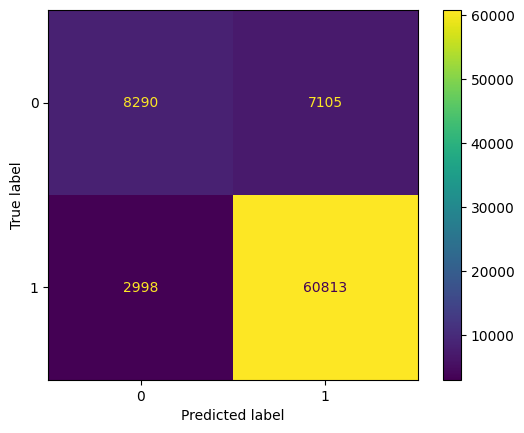

In [141]:
# This code visually displays the confusion matrix as a plot.
# Rows represent the actual labels, and columns represent the predicted labels.

ConfusionMatrixDisplay(conf_mat).plot()
plt.show()

<b>True Negatives (TN)</b>: Model correctly predicts the negative class : <i>8290</i><br>
<b>False Positives (FP)</b>: Model incorrectly predicts the positive class: <i>7105</i><br>
<b>False Negatives (FN)</b>: Model incorrectly predicts the negative class (misses the positive) : <i>2998</i>.<br>
<b>True Positives (TP)</b>: Model correctly predicts the positive class : <i>60813</i>.<br>

If True Positives (TP) and True Negatives (TN) are large values, means model is performing well.<br>
If we got large False Positives (FP) or False Negatives (FN), means model is making mistakes.

<h3> (b) CLASSIFICATION REPORT AND COMMENTS:- </h3>

In [142]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [143]:
precision_score(y_test, y_test2_pred)

np.float64(0.8953885567890691)

In [144]:
recall_score(y_test, y_test2_pred)

np.float64(0.9530175048189183)

In [145]:
f1_score(y_test, y_test2_pred)

np.float64(0.9233046633619021)

In [146]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test2_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.54      0.62     15395
           1       0.90      0.95      0.92     63811

    accuracy                           0.87     79206
   macro avg       0.81      0.75      0.77     79206
weighted avg       0.86      0.87      0.86     79206



<b>Accuracy:-</b>

The overall accuracy is 87%, which indicates good model performance.
<br>

<b>Precision:-</b>
<br>
Class 0 (e.g., Loan Rejected): Precision = 73% → The model correctly predicted most of the rejected loans.<br>
Class 1 (e.g., Loan Approved): Precision = 90% → The model correctly predicted most of the approved loans.<br>
<br>
<br>
<b>Recall:-</b><br>
Class 0 Recall = 54% → Most rejected loans were correctly identified.<br>
Class 1 Recall = 95% → The model missed 5% of actual loan approvals.<br>


<h3> (c) AU-ROC CURVE AND COMMENTS:- </h3>

In [147]:
from sklearn.metrics import roc_curve, roc_auc_score , auc

In [148]:
probability = model2.predict_proba(X_test)
probability

array([[0.76510639, 0.23489361],
       [0.21991212, 0.78008788],
       [0.24022548, 0.75977452],
       ...,
       [0.04664938, 0.95335062],
       [0.36660095, 0.63339905],
       [0.02099923, 0.97900077]])

In [149]:
probabilities = probability[:, 1]
probabilities

array([0.23489361, 0.78008788, 0.75977452, ..., 0.95335062, 0.63339905,
       0.97900077])

In [150]:
fpr, tpr, thr = roc_curve(y_test, probabilities)

In [151]:
print(f'FPR:\n {fpr}\n\n\n')
print(f'TPR:\n {tpr}\n\n\n')
print(f'Threshold:\n {thr}')

FPR:
 [0.         0.         0.         ... 0.99948035 0.99948035 1.        ]



TPR:
 [0.00000000e+00 1.56712792e-05 1.25370234e-04 ... 9.99952986e-01
 1.00000000e+00 1.00000000e+00]



Threshold:
 [           inf 9.99886182e-01 9.99649460e-01 ... 4.28003739e-03
 3.88230802e-03 5.53295624e-04]


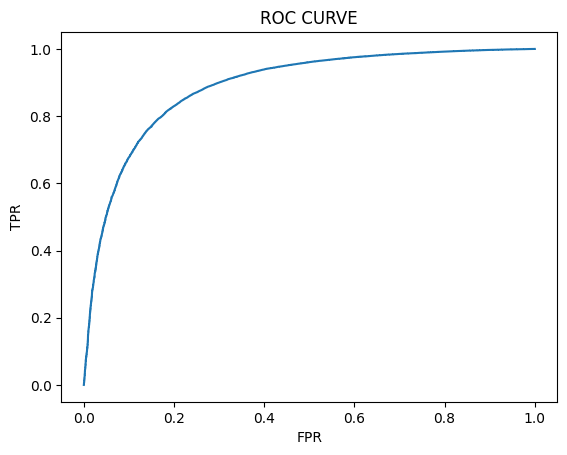

In [152]:
plt.plot(fpr,tpr)
plt.title('ROC CURVE')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [153]:
roc_auc_score(y_test, probabilities)

np.float64(0.889002959469425)

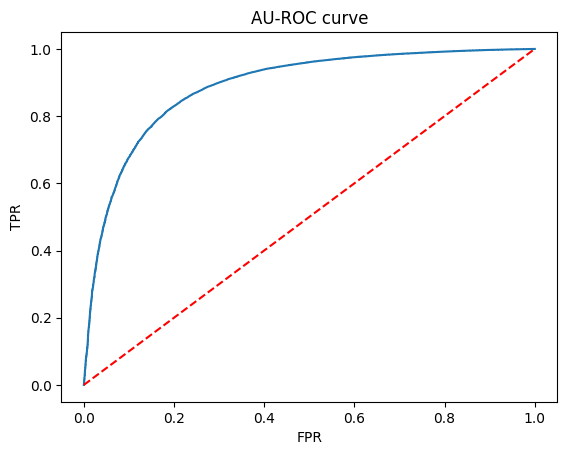

In [154]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr,'--', color='red')
plt.title('AU-ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

<h5>1. <code>model2.predict_proba(X_test)</code>:-</h5>

- This gives the probabilities predicted by the model for each class (0 or 1).<br>
- <code>probability[:, 1]</code> extracts the probabilities for the positive class (class 1).

<h5>2. <code>roc_curve(y_test, probabilities)</code>:-</h5>

  This function calculates three key outputs:-
- FPR (False Positive Rate): The proportion of negative samples wrongly predicted as positive.
- TPR (True Positive Rate or Recall): The proportion of positive samples correctly predicted as positive.
- Thresholds: Different probability thresholds the model uses to classify predictions as positive or negative.

<h5>3. PLOTTING THE ROC CURVE:-</h5>

- The X-axis is the False Positive Rate (FPR).
- The Y-axis is the True Positive Rate (TPR).
- The curve shows the trade-off between sensitivity (TPR) and false positives (FPR) at various thresholds.

<h5>4. <code>roc_auc_score(y_test, probabilities)</code>:-</h5>

- This calculates the AUC (Area Under the ROC Curve) score, which tells the overall ability of the model to distinguish between classes.
- AUC ranges from 0 to 1.
- AUC = 1: Perfect model.
- AUC = 0.5: Model performs like random guessing.
- The closer AUC is to 1, the better the model's performance.

<h5>5. Diagonal Reference Line <code>(plt.plot(fpr, fpr, '--', color='red')) </code>:- </h5>

- This line represents a random model (a model that predicts without learning anything).
- A good model will have its ROC curve well above this red line.

<h3> (d) PRECISION RECALL CURVE AND COMMENTS :- </h3>

In [155]:
from sklearn.metrics import precision_recall_curve

In [156]:
precision, recall, thr = precision_recall_curve(y_test, probabilities)

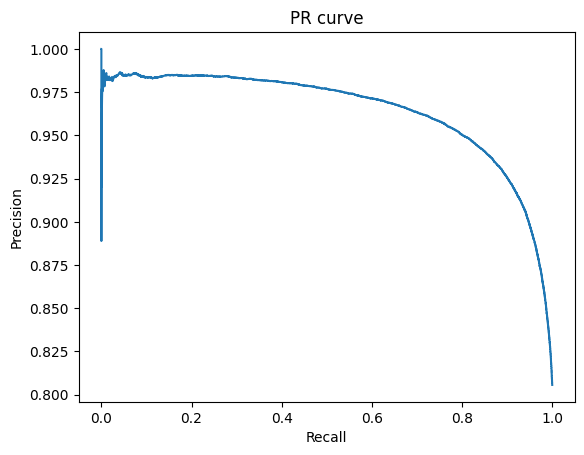

In [157]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [158]:
auc(recall, precision)

np.float64(0.9642508100878731)


<ul>
  <li>The curve starts with <strong>high precision</strong> but drops as recall increases.</li>
  <li>This shows that capturing more positives also includes more false positives.</li>
</ul>

<ul>
  <li>The model balances precision and recall well at moderate thresholds.</li>
  <li>At very high recall, precision drops significantly, showing a trade-off.</li>
</ul>

<ul>
  <li>The model works well when a balance between precision and recall is needed.</li>
  <li>It may struggle in scenarios requiring very high recall.</li>
</ul>
